# Authors
Emily Rothrock, Sophie Phillips, Anwita Molaka, Livvy Yurish

# Summary

The **General Social Survey**, a panel data survey on Americans' social and economic views, provides a clear perspective on the nature of social opinions, what factors may have an impact on them, and how they may have changed over the course of a few years. In this report, the *presence of any relationships between religion, age, and gender on gender role views* was investigated. Historically, studies have shown that the environment in which you live plays a large role in the formation of your thoughts, opinions, and behaviors. The opinions of family, friends, and society have great influence over an individual's thoughts, particularly regarding gender role views. Thus, it is important to study these relationships in order to understand the extent of these impacts. For this project, several interesting questions surrounding American opinion on gender role views were extracted from the GSS dataset for analysis. The variables that required the most data cleaning were religion, age, and gender, since these are the main variables we studied. Missing values were removed and the different data were categorized, based on each variable. For data visualization, graphs that showed counts for each question surrounding gender role views were first created, based on the various responses. Then, subplots containing each question, with counts grouped by the variable of interest, were created for further analysis. When looking at gender role views grouped by religion, some questions, like the one associated with the variable 'prntfnce', revealed differences in opinions about gender roles between individuals of varying religion, which could be explained by religious and cultural history and upbringing. When looking at gender role views grouped by age, some questions revealed differences in opinions between individuals of a younger age (18-29) and individuals of an older age (65-89), which could be due to the generational gap and changing societal values over time. Finally, when looking at gender role views grouped by sex, many questions displayed similar and expected patterns in the responses received, while some, like the question associated with the variable 'fechld', provided some interesting insights which could be explained by traditional societal expectations and their impact on individual thought and opinion.



# Data

### Getting the GSS Data

Since the data files are about 40GB zipped, we can't store a compressed or uncompressed version on GitHub, and the entire dataset can't really be loaded into memory with Colab.

On GitHub, the data are broken into three smaller files, saved in .parquet format. The code below will load these chunks into memory, one at a time, you can specify the variables you want in `var_list`, and the results will be saved in `selected_gss_data.csv`.


In [ ]:
import pandas as pd
#
var_list = ['wrkstat', 'prestige'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    #print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    #print(df.head()) # Visually inspect the first few rows
    df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                              mode=modes[phase], # control write versus append
                              header=var_list, # variable names
                              index=False) # no row index saved
    phase = 1 # Switch from write mode to append mode

### The Data We Are Looking At

Several variables, that selected for different opinions on gender roles, were analyzed against religion, gender, and race to determine the relationship between them, if any at all.
Most responses to the GSS survey questions were categorical values that correlated to a level of agreenace with a provided statement.

Some of the key variables analyzed are listed and defined below:


1.   **Fepresch2**: (To what extent do you agree or disagree...?) A pre-school child is likely to suffer if his or her mother works.
2.   **Prntlk**: People have different opinions about how well mothers and fathers are suited to look after their children. Which of the following statements comes closest to your opinion?
3. **Prntfnce**: Please consider a family with a father and a mother raising a child who is five years old. In your opinion, which parent should do the following? Who should... ...provide for the family financially?
4. **Sharehhw**: Which of the following best applies to the sharing of household work between you and your spouse/partner?
5. **Cabgndr**: People may have different opinions about whether women or men are best suited to serve in certain leadership positions. Please consider the following positions and select the options that come closest to your own opinion.
6. **Execgndr**: (Please consider the following positions and select the options that come closest to your own opinion.) Senior executive of a large company
7. **Orginc**: How do you and your spouse/partner organize the income that one or both of you receive? Please choose the option that comes closest.
8. **Fechld**: To what extent do you agree or disagree...? A working mother can establish just as warm and secure a relationship with her children as a mother who does not work.
9. **Rfamlook**: (On average, how many hours a week do you spend...) ...looking after family members (e.g. children, elderly, ill or disabled family members)?
10. **Rspgndr**: People have different opinions about how much responsibility women and men should have for the home and family. Which of the following statements comes closest to your opinion?
11. **Prntcre**: (In your opinion, which parent should do the following? Who should...) ...take care of the child on a daily basis?
12. **Prntply**: (In your opinion, which parent should do the following? Who should...) ...play with the child, and take part in his/her leisure activities?
13. **Prntbhav**:  (In your opinion, which parent should do the following? Who should...) ...teach the child how to behave?
14. **Prntadvs**: (In your opinion, which parent should do the following? Who should...) ...take time to listen to and advise the child if he/she has problems?
15. **Prntmdl**: (In your opinion, which parent should do the following? Who should...) ...try to be a role model for the child?
16. **Univgndr**: (Please consider the following positions and select the options that come closest to your own opinion.) Head of a university





In [ ]:
# imports

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# copied the dataframe over so that all the data doesn't have to be reloaded if changes are made
df_basic_bar_graphs = df.copy()

# dataframes filtered to responses for each questions
fechld = df_basic_bar_graphs['fechld']
fepresch2 = df_basic_bar_graphs['fepresch2']
rspgndr = df_basic_bar_graphs['rspgndr']
prntlk = df_basic_bar_graphs['prntlk']
prntfnce = df_basic_bar_graphs['prntfnce']
prntcre = df_basic_bar_graphs['prntcre']
prntply = df_basic_bar_graphs['prntply']
prntbhav = df_basic_bar_graphs['prntbhav']
prntadvs = df_basic_bar_graphs['prntadvs']
prntmdl = df_basic_bar_graphs['prntmdl']
orginc = df_basic_bar_graphs['orginc']
sharehhw = df_basic_bar_graphs['sharehhw']
cabgndr = df_basic_bar_graphs['cabgndr']
univgndr = df_basic_bar_graphs['univgndr']
execgndr = df_basic_bar_graphs['execgndr']
rfamlook = df_basic_bar_graphs['rfamlook'] # this one is numeric and needs 12 bins

# list of each dataframe and it's corresponding question name
df_list = [fechld, fepresch2, rspgndr, prntlk, prntfnce, prntcre, prntply, prntbhav, prntadvs, prntmdl, sharehhw, cabgndr, univgndr, execgndr, orginc, rfamlook]
df_names = ['fechld', 'fepresch2', 'rspgndr', 'prntlk', 'prntfnce', 'prntcre', 'prntply', 'prntbhav', 'prntadvs', 'prntmdl', 'sharehhw', 'cabgndr', 'univgndr', 'execgndr', 'orginc', 'rfamlook']

In [ ]:
# all responses for the questions we are looking at
fechld_responses = ['strongly agree','agree', 'disagree','strongly disagree']
fepresch2_responses = ['strongly agree','agree', 'neither agree nor disagree','disagree','strongly disagree']
rspgndr_responses = ['women take much more responsibility', 'women take somewhat more responsibility', 'women and men take equal responsibility', 'men take somewhat more responsibility', 'men take much more responsibility']
prntlk_responses = ['mothers are much better suited','mothers are somewhat better suited','mothers and fathers are equally suited','fathers are somewhat better suited','fathers are much better suited']
prntfnce_responses = ['the mother mostly','the mother somewhat more than the father','the mother and father equally','the father somewhat more than the mother','the father mostly']
prntcre_responses = ['the mother mostly','the mother somewhat more than the father','the mother and father equally','the father somewhat more than the mother','the father mostly']
prntply_responses = ['the mother mostly','the mother somewhat more than the father','the mother and father equally','the father somewhat more than the mother','the father mostly']
prntbhav_responses = ['the mother mostly','the mother somewhat more than the father','the mother and father equally','the father somewhat more than the mother','the father mostly']
prntadvs_responses = ['the mother mostly','the mother somewhat more than the father','the mother and father equally','the father somewhat more than the mother','the father mostly']
prntmdl_responses = ['the mother mostly','the mother somewhat more than the father','the mother and father equally','the father somewhat more than the mother','the father mostly']
orginc_responses = ['r manage all money and gives spouse/partner his/her share',
                                      'r spouse/partner manages all money and gives r share',
                                      'r and spouse/partner pool all money and take what we need',
                                      'r and spouse/partner pool some money and keep rest separate',
                                      'r and spouse/partner keep money separate']
sharehhw_responses = ['r does much more than fair share',
                                      'r does a bit more than fair share',
                                      'r does roughly fair share',
                                      'r does a bit less than fair share',
                                      'r does much less than fair share']
cabgndr_responses = ['women are much better suited',
                                      'women are somewhat better suited',
                                      'women and men are equally suited',
                                      'men are somewhat better suited',
                                      'men are much better suited']
univgndr_responses = ['women are much better suited',
                                      'women are somewhat better suited',
                                      'women and men are equally suited',
                                      'men are somewhat better suited',
                                      'men are much better suited']
execgndr_responses = ['women are much better suited',
                                      'women are somewhat better suited',
                                      'women and men are equally suited',
                                      'men are somewhat better suited',
                                      'men are much better suited']

responses_list = [fechld_responses, fepresch2_responses, rspgndr_responses, prntlk_responses, prntfnce_responses, prntcre_responses, prntply_responses, prntbhav_responses, prntadvs_responses, prntmdl_responses, sharehhw_responses, cabgndr_responses, univgndr_responses, execgndr_responses, orginc_responses]

### Basic plots were made for each of these survey questions/variables:
Bar plots displaying the overall value counts received per option

These were fairly straightforward to make, as each graph is a basic barplot of the count for each response per question. Making the subplot was a bit challenging because it wasn't something we had gone over in class, but becasue we didn't use seaborn for this specific plot, there were more resources out there on how to for-loop and create a large subplot.

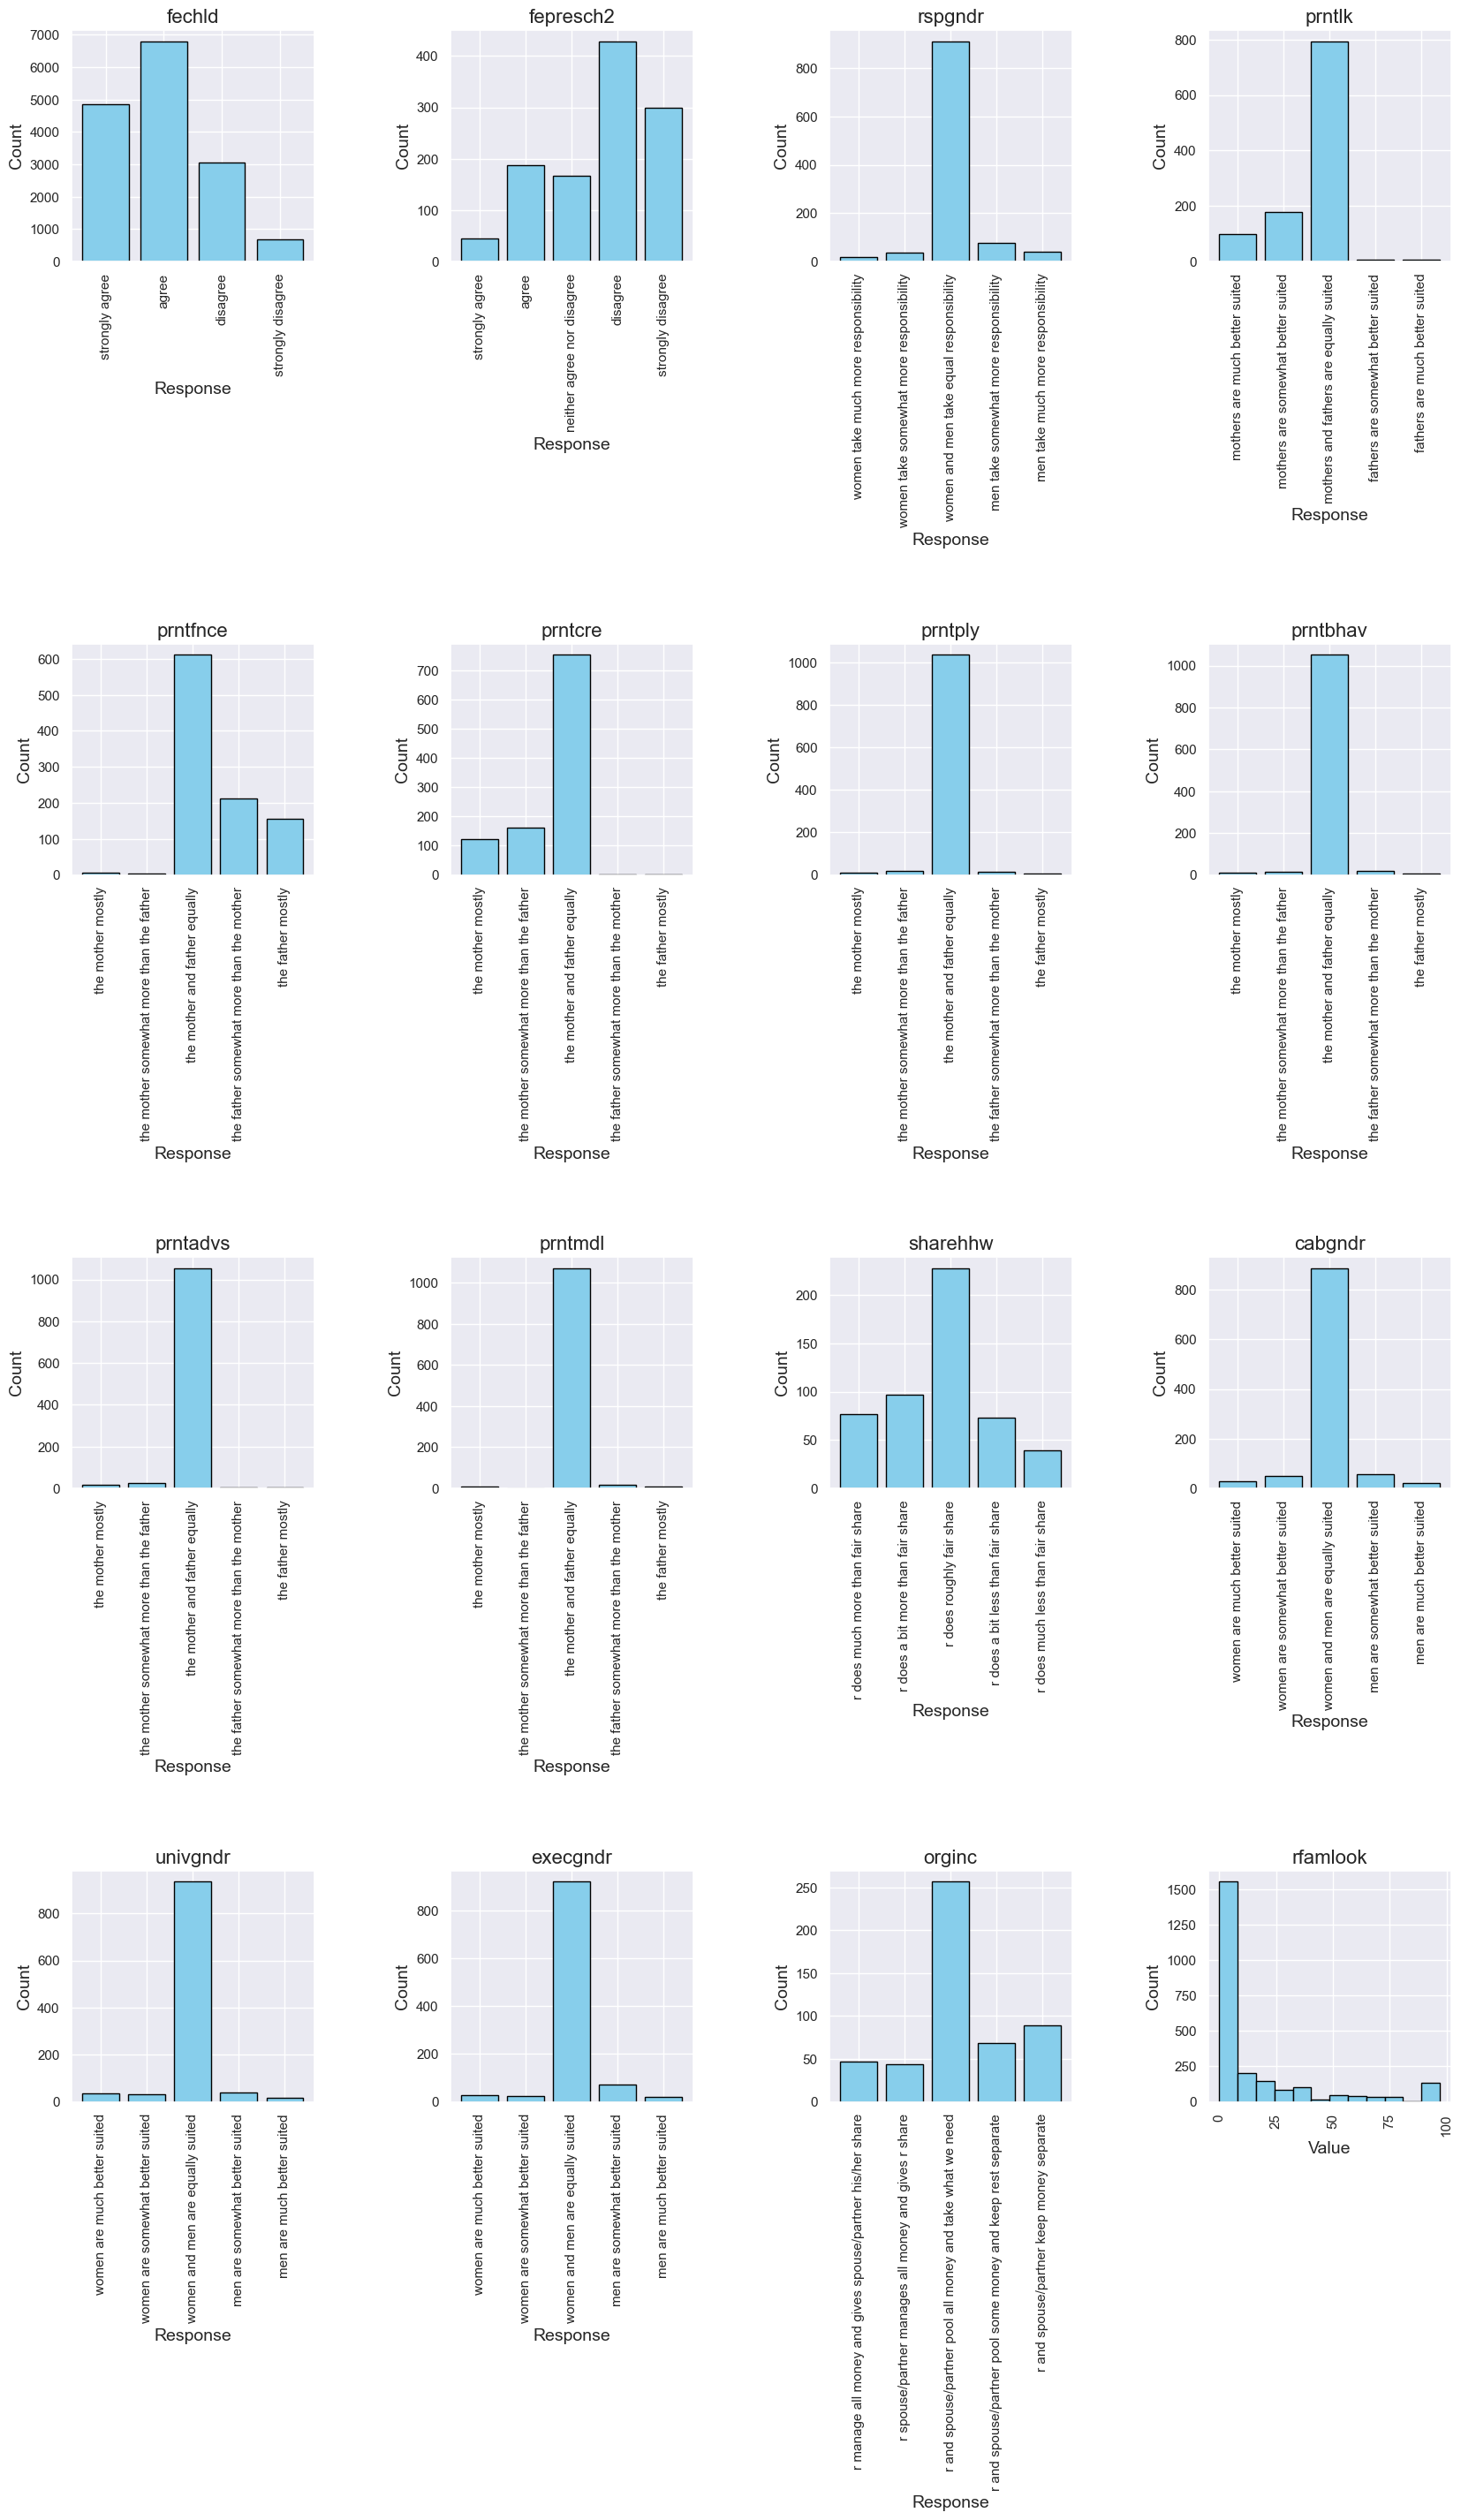

In [ ]:
# subplot code
fig, axs = plt.subplots(4, 4, figsize=(18, 30))
for i, ax in enumerate(axs.flatten()):
    if i == (len(df_list) - 1): # skip last dataframe that needs to be handled differently because values are numeric
        continue

    name = df_names[i] # current question name
    curr_response = responses_list[i] # responses for current question we're graphing
    curr_df = df_list[i].value_counts()[curr_response] # value counts for each response

    # handles renaming columns for reference later while graphing
    curr_df = curr_df.reset_index()
    curr_df.columns = ['response', 'count']

    # gets rid of zero values
    curr_df = curr_df.loc[curr_df['count'] != 0]

    # actual graphing
    ax.bar(x = curr_df['response'], height=curr_df['count'], color='skyblue', edgecolor='black')
    ax.set_title(f'{name}', fontsize=16)
    ax.set_xlabel('Response', fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    ax.tick_params(axis='x', labelrotation=90)

# the last questions we're looking at is numeric and not categorical, so it has to be handled differently in the subplot
name = df_names[len(df_list) - 1]
curr_df = rfamlook
curr_df = curr_df.reset_index().rename(columns={0: "value"})

# graphing
axs[3,3].hist(x = curr_df['rfamlook'], bins=12, color='skyblue', edgecolor='black')
axs[3,3].set_title(f'{name}', fontsize=16)
axs[3,3].set_xlabel('Value', fontsize=14)
axs[3,3].set_ylabel('Count', fontsize=14)
axs[3,3].tick_params(axis='x', labelrotation=90)

# fix spacing and show final subplot
plt.tight_layout()
fig.subplots_adjust(hspace=1.4)
fig.tight_layout(pad=5.0)
plt.show()

### Bar Graphs of Gender Role Questions Grouped by Religion
These are grouped bar graphs where we looked at the percentage of interviewees from a certain religion for each response. We had to normalize these to be out of 100% for each group so that it was consistent across varying religions for each response that a question has.

This plot was much more complex to make. First, the religions overlapped some, so certain religions had to be lumped together. For example, all Christian religions were replaced with 'christian' and any religions with other in their name got replaced to 'other'. For clarity, none was replaced with 'athiest' and muslim/islam was just replaced with 'muslim'. All other religions remained the same.

At first, these graphs were created without any normalization, but that soon proved to be a problem because we were comparing apples to oranges. However, the hardest error to solve was actually due to some funky data formatting in the original dataframe that we kept running into. For some reseason, the religion response types were in a series, so those all had to be converted to a string for plotting. The value counts also had to be converted to ints for normalization, which proved trickier than it seems.

In [ ]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns

# grouping the major religion types together because there is some weird overlap and it would clutter up any graphs
df_grouped_bar_graph = df.copy()
relig = df_grouped_bar_graph['relig'].astype(str)
relig = relig.replace(['other eastern religions', 'other'], 'other')
relig = relig.replace(['protestant', 'catholic', 'other eastern religions', 'orthodox-christian', 'christian'], 'christian')
relig = relig.replace(['muslim/islam'], 'muslim')
relig = relig.replace(['none'], 'atheist')
df_grouped_bar_graph['relig'] = relig

In [ ]:
# Statistics of Religion -- Categorical Variable
print(relig.describe(), '\n')
print(relig.value_counts()) # after cleaning

count         24130
unique           10
top       christian
freq          17292
Name: relig, dtype: object 

relig
christian                  17292
atheist                     5326
jewish                       392
other                        333
nan                          247
buddhism                     200
muslim                       136
hinduism                     117
inter-nondenominational       64
native american               23
Name: count, dtype: int64


In [ ]:
# used to normalize the count to percentage of interviewees of each religion group that answered yes for each response
def normalize_each_religion(df, religions):
    # copy the dataframe
    df_norm = df.copy()
    count = df_norm['count'].astype(float)
    df_norm['count'] = count
    for religion in religions:
        religion_sum = df_norm['count'].loc[df_norm['relig'] == religion].sum()
        df_norm['count'].loc[df_norm['relig'] == religion] = ((df_norm['count'].loc[df_norm['relig'] == religion])/religion_sum) * 100
    return df_norm

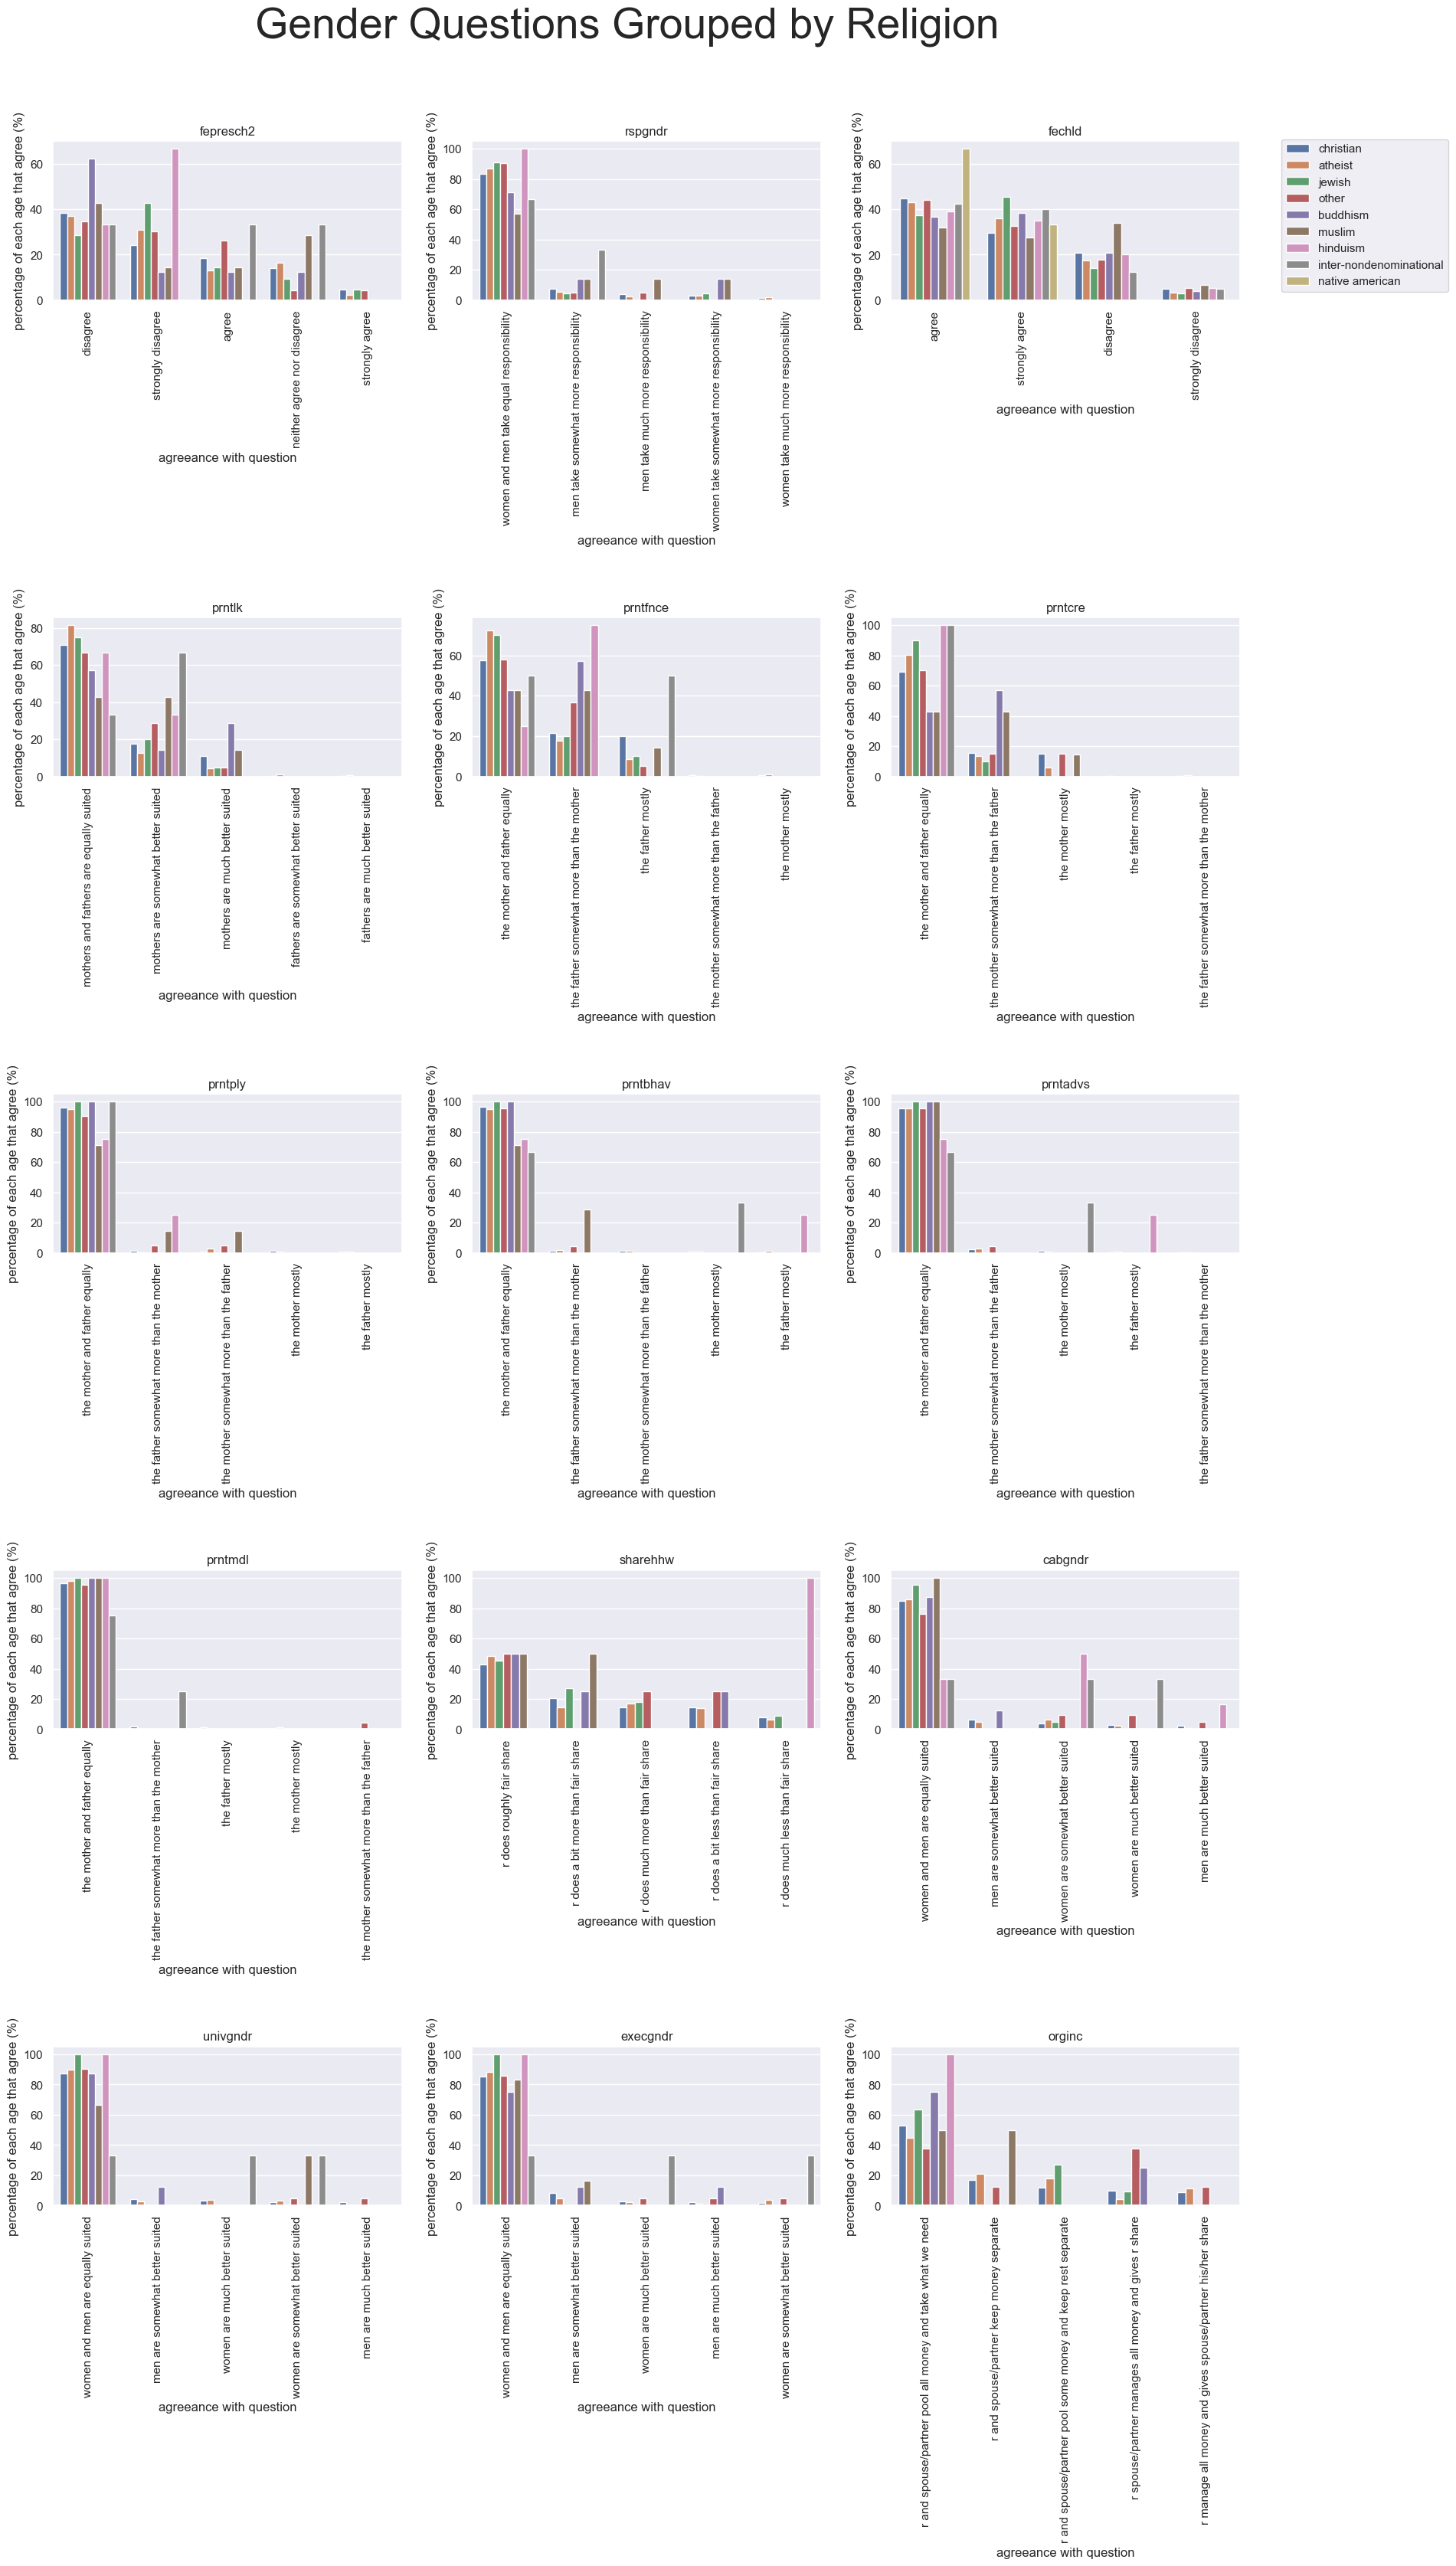

In [ ]:
import matplotlib.pyplot as plt

# handles general plot layout and formatting
plt.figure(figsize=(20, 35))
plt.tight_layout(pad=20.0)
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Gender Questions Grouped by Religion", fontsize=40, y=0.93)

# questions in survey that were relevant to our research question
tickers = ['fepresch2', 'rspgndr', 'fechld', 'prntlk', 'prntfnce', 'prntcre', 'prntply', 'prntbhav', 'prntadvs', 'prntmdl', 'sharehhw', 'cabgndr', 'univgndr', 'execgndr', 'orginc']

# loops through every relevant survey question for our research question
for n, ticker in enumerate(tickers): # ticker is the current question we are looking at
    ax = plt.subplot(5, 3, n + 1) # size of plot
    curr_df = df_grouped_bar_graph.loc[:, ['relig', ticker]].copy() # grab only the data related to current question and religion
    col = curr_df[ticker].astype(str) # handles inconsistent types
    curr_df[ticker] = col
    curr_df = curr_df.dropna() # dropping all rows with NaN values because they can't be graphed
    curr_df = curr_df.loc[curr_df['relig'] != 'nan'] # other way of dropping NaN in case above way doesn't work

    if(ticker == 'rfamlook'): # handles the one numeric question because the rest are categorical
      response = pd.DataFrame(data = curr_df.groupby(ticker).count())
    else:
      response = pd.DataFrame(data = curr_df[ticker].value_counts())
    response = response.reset_index()
    response.columns = ['response', 'count']

    curr_df = curr_df.loc[curr_df[ticker].isin(response['response'])].value_counts()
    curr_df = curr_df.reset_index().rename(columns={"index": ticker, 0: "count"})
    curr_df = curr_df.loc[curr_df[ticker] != 'nan']

    religions = curr_df['relig'].unique() # ensure no duplicate religion
    curr_df = normalize_each_religion(curr_df, religions) # normalize the data

    if(ticker == 'rfamlook'): # the one numeric question that needs to be handled differently
      continue # we ultimately decided to skip it because it seemed strange to have a numerical subplot when all other subplots were categorical

      sns.barplot(data = curr_df, x = ticker, hue = 'relig')
      sns.set(rc={'figure.figsize':(6,4)})
      plt.legend(loc='upper right', title='Religion', prop={'size': 7})
      plt.xlabel("count")
      plt.ylabel("religion")
      plt.title(ticker)

    elif ticker == 'fechld': # used for legend placement
      sns.barplot(data = curr_df, x = ticker, y = 'count', hue = 'relig') # graph and group by religion type for each response to the current question
      sns.set(rc={'figure.figsize':(6,4)})
      plt.xlabel("agreeance with question")
      plt.ylabel("percentage of each age that agree (%)")
      plt.title(ticker)
      ax.tick_params(axis='x', labelrotation=90) # rotate x labels 90 degrees
      ax.legend(bbox_to_anchor=(1.1, 1.05)) # only put the legend on the top-most right graph so that the legend can be seen properly

    else:
      sns.barplot(data = curr_df, x = ticker, y = 'count', hue = 'relig') # graph and group by religion type for each response to the current question
      sns.set(rc={'figure.figsize':(6,4)})
      plt.xlabel("agreeance with question")
      plt.ylabel("percentage of each age that agree (%)")
      plt.title(ticker)
      ax.tick_params(axis='x', labelrotation=90)
      plt.legend([],[], frameon=False) # get rid of legend for all other subplots

# show the final plot
plt.subplots_adjust(hspace = 2.0)
plt.show()

### Bar Graphs of Gender Role Questions Grouped by Age

The process and visualization here is the same as for religion, but instead age is grouped into different categories to make the plots cleaner.

#### Grouping/Cleaning Age Ranges

In [ ]:
print(df['age'].unique()) # see all various ages

[48. 25. 42. 24. 31. 46. 52. 50. 32. 57. 62. 66. 34. 30. 27. 59. 19. 23.
 35. 44. 78. 33. 21. 77. 70. 69. 26. 89. 37. 68. 83. 61. 72. 53. 79. 58.
 36. 51. 56. 43. 40. 82. 41. 73. 85. 64. 22. 39. 75. 80. 49. 76. 60. 74.
 28. 47. 63. 20. 55. 18. 81. 86. 67. 45. 84. nan 38. 65. 54. 29. 71. 87.
 88.]


Before coercion: 
 count    23539.000000
mean        49.094651
std         17.633970
min         18.000000
25%         34.000000
50%         48.000000
75%         63.000000
max         89.000000
Name: age, dtype: float64 



<Axes: >

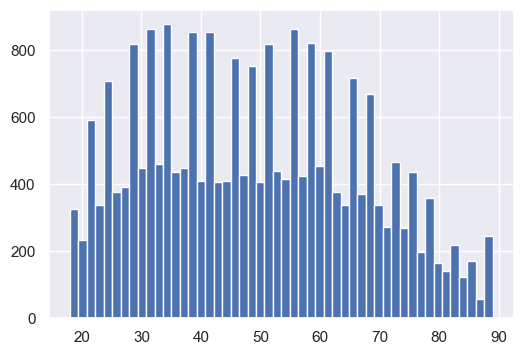

In [ ]:
print('Before coercion: \n', df['age'].describe(),'\n') # The age variable is not read by Pandas as a number
df['age'].hist(bins=50) # Initial histogram; check out the x axis to see the concentration of various ages

In [ ]:
# Create a missing dummy:
df['age'+'_nan'] = df['age'].isnull() # Equals 1 if missing, 0 if non-null
print('Total Missings: \n', sum(df['age'+'_nan']),'\n') # How many missing values are there?


Total Missings: 
 591 



In [ ]:
# process of cleaning null values
age = df['age']
age_cleaned = age[~age.isnull()]
print(age_cleaned.unique())

[48. 25. 42. 24. 31. 46. 52. 50. 32. 57. 62. 66. 34. 30. 27. 59. 19. 23.
 35. 44. 78. 33. 21. 77. 70. 69. 26. 89. 37. 68. 83. 61. 72. 53. 79. 58.
 36. 51. 56. 43. 40. 82. 41. 73. 85. 64. 22. 39. 75. 80. 49. 76. 60. 74.
 28. 47. 63. 20. 55. 18. 81. 86. 67. 45. 84. 38. 65. 54. 29. 71. 87. 88.]


In [ ]:
# Create a missing dummy CLEANED:
age_cleaned_nan = age_cleaned.isnull() # Equals 1 if missing, 0 if non-null
print('Total Missings: \n', sum(age_cleaned_nan),'\n') # How many missing values are there?

Total Missings: 
 0 



In [ ]:
# Statistics of Age -- Numerical Variable
df['age'].describe() # after cleaning

count    23539.000000
mean        49.094651
std         17.633970
min         18.000000
25%         34.000000
50%         48.000000
75%         63.000000
max         89.000000
Name: age, dtype: float64

In [ ]:
import numpy as np
age_18to29 = np.array([])
age_30to39 = np.array([])
age_40to49 = np.array([])
age_50to64 = np.array([])
age_65to89 = np.array([])

# handles the appending of various age data to arrays of age groups
for age in df['age']:
  if 18 <= age <= 29:
    age_18to29 = np.append(age_18to29,age)
  elif 30 <= age <= 39:
    age_30to39= np.append(age_30to39,age)
  elif 40 <= age <= 49:
    age_40to49= np.append(age_40to49,age)
  elif 50 <= age <= 64:
    age_50to64= np.append(age_50to64,age)
  elif 65 <= age <= 89:
    age_65to89 = np.append(age_65to89,age)

# double checking values in arrays are appropriate
print(age_18to29)
print(age_65to89)

[25. 24. 24. ... 29. 22. 29.]
[66. 78. 77. ... 78. 73. 84.]


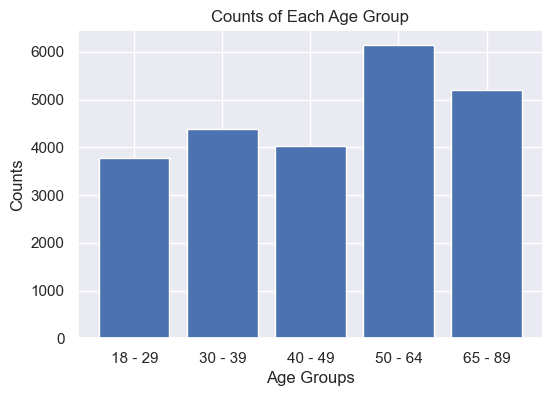

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# grouped ages
age_ranges = ['18 - 29', '30 - 39', '40 - 49', '50 - 64', '65 - 89']
age_range_counts = [len(age_18to29), len(age_30to39), len(age_40to49), len(age_50to64), len(age_65to89)]

# creates basic bar graph to show number of responses for each age range
plt.bar(age_ranges, age_range_counts)
plt.xlabel('Age Groups')
plt.ylabel('Counts')
plt.title('Counts of Each Age Group')
plt.show()

#### Bar graphs

In [ ]:
# used to normalize the count to percentage of interviewees of each age group that answered yes for each response
def normalize_each_age(df, ages):
    # copy the dataframe and handle inconsistent types for data
    df_norm = df.copy()
    ages = df_norm['age'].astype(int)
    df_norm['age'] = ages
    count = df_norm['count'].astype(float)
    df_norm['count'] = count

    age_bins = [18, 30, 40, 50, 65, 90]

    # Create a new column in the dataframe to store the age range labels
    df_norm['age_range'] = pd.cut(df_norm['age'], bins=age_bins, labels=age_ranges, right=False)

    # Group by age range and sum the counts
    age_range_counts = df_norm.groupby('age_range', group_keys = False)['count'].sum().reset_index()

    # Normalize counts within each age range
    age_range_counts['count'] = age_range_counts.groupby('age_range', group_keys = False)['count'].apply(lambda x: (x / x.sum()) * 100)

    df_norm.drop(columns=['age'], inplace=True)
    return df_norm

/var/folders/kj/f8tbgk5d44lgj0wbjtwmy6qw0000gn/T/ipykernel_92354/514606146.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_range_counts = df_norm.groupby('age_range', group_keys = False)['count'].sum().reset_index()
/var/folders/kj/f8tbgk5d44lgj0wbjtwmy6qw0000gn/T/ipykernel_92354/514606146.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_range_counts['count'] = age_range_counts.groupby('age_range', group_keys = False)['count'].apply(lambda x: (x / x.sum()) * 100)
/var/folders/kj/f8tbgk5d44lgj0wbjtwmy6qw0000gn/T/ipykernel_92354/514606146.py:16: FutureWarning: The default of observed=False is d

/var/folders/kj/f8tbgk5d44lgj0wbjtwmy6qw0000gn/T/ipykernel_92354/514606146.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_range_counts = df_norm.groupby('age_range', group_keys = False)['count'].sum().reset_index()
/var/folders/kj/f8tbgk5d44lgj0wbjtwmy6qw0000gn/T/ipykernel_92354/514606146.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_range_counts['count'] = age_range_counts.groupby('age_range', group_keys = False)['count'].apply(lambda x: (x / x.sum()) * 100)
/var/folders/kj/f8tbgk5d44lgj0wbjtwmy6qw0000gn/T/ipykernel_92354/514606146.py:16: FutureWarning: The default of observed=False is d

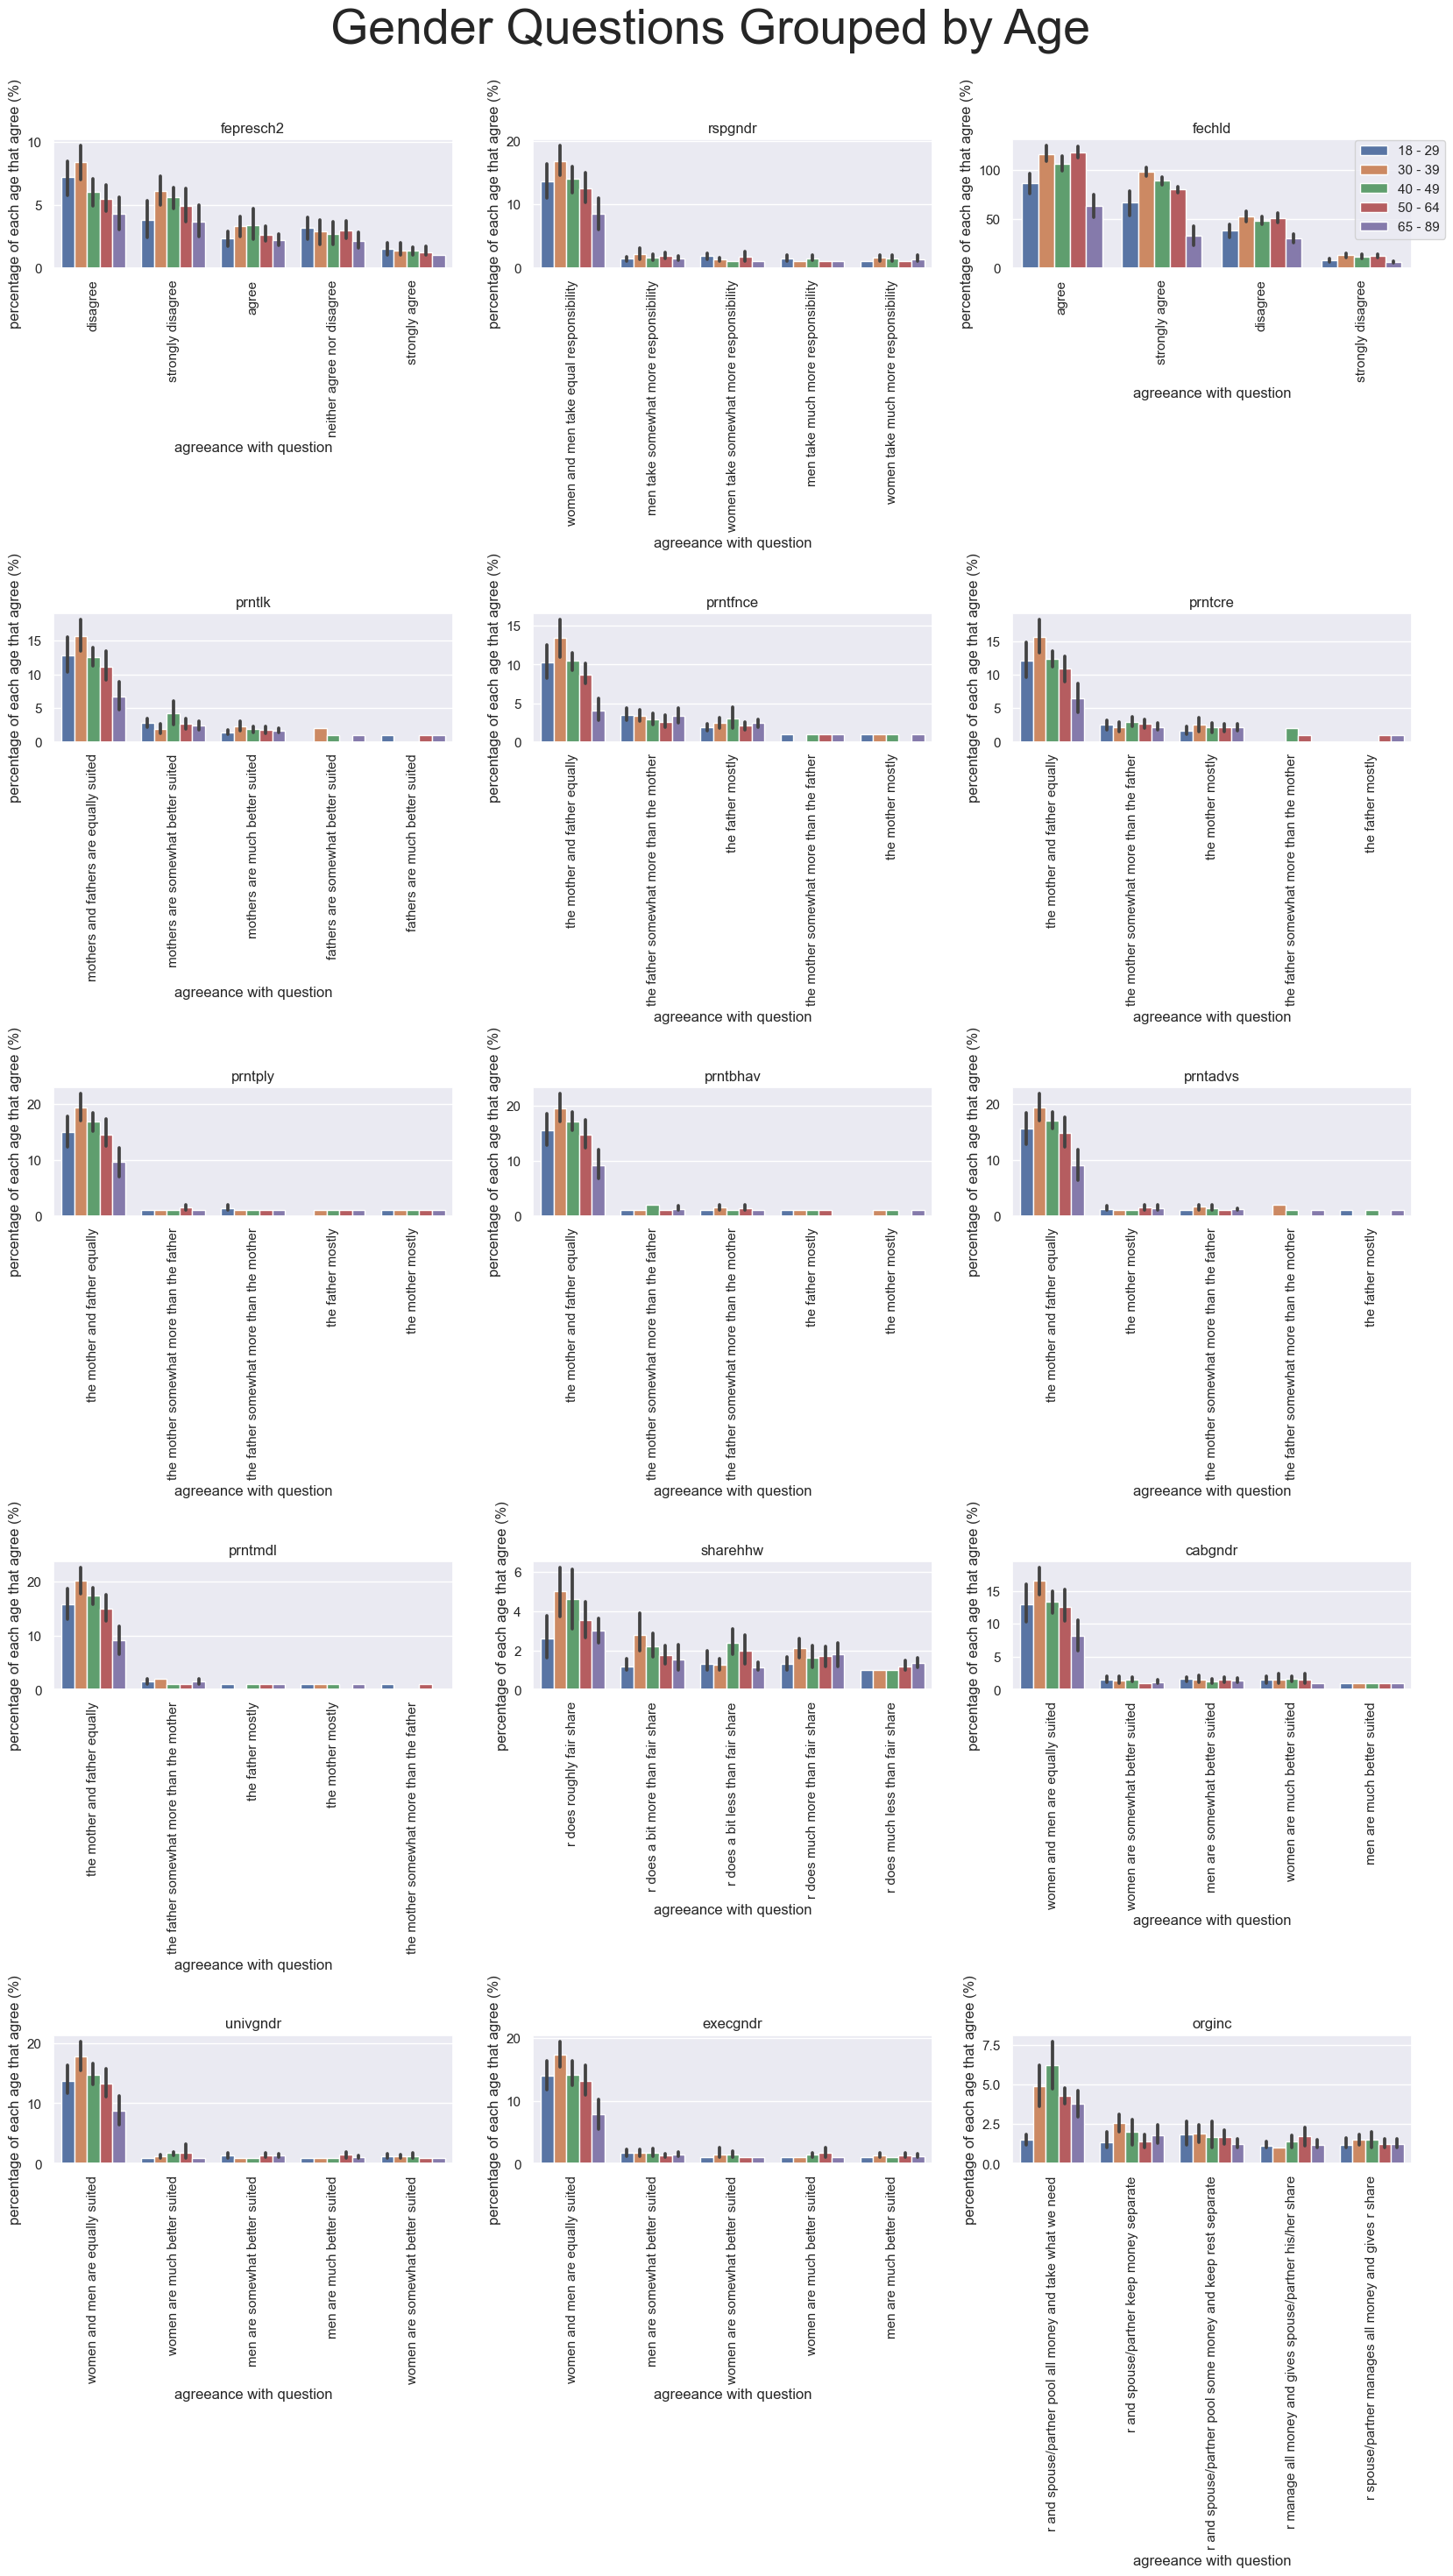

In [ ]:
import matplotlib.pyplot as plt

# handles general plot layout and formatting
plt.figure(figsize=(20, 30))
plt.tight_layout(pad=20.0)
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Gender Questions Grouped by Age", fontsize=40, y=0.93)

# questions in survey that were relevant to our research question
tickers = ['fepresch2', 'rspgndr', 'fechld', 'prntlk', 'prntfnce', 'prntcre', 'prntply', 'prntbhav', 'prntadvs', 'prntmdl', 'sharehhw', 'cabgndr', 'univgndr', 'execgndr', 'orginc']

# loops through every relevant survey question for our research question
for n, ticker in enumerate(tickers):
    ax = plt.subplot(5, 3, n + 1) # size of plot
    curr_df = df_grouped_bar_graph.loc[:, ['age', ticker]].copy()  # grab only the data related to current question and age
    col = curr_df[ticker].astype(str) # handles inconsistent data types
    curr_df[ticker] = col
    curr_df = curr_df.dropna() # dropping all rows with NaN values because they can't be graphed

     # handles the one numeric question because the rest are categorical
    if(ticker == 'rfamlook'):
      response = pd.DataFrame(data = curr_df.groupby(ticker).count())
    else:
      response = pd.DataFrame(data = curr_df[ticker].value_counts())
    response = response.reset_index()
    response.columns = ['response', 'count']

    curr_df = curr_df.loc[curr_df[ticker].isin(response['response'])].value_counts()
    curr_df = curr_df.reset_index().rename(columns={"index": ticker, 0: "count"})
    curr_df = curr_df.loc[curr_df[ticker] != 'nan']

    ages = curr_df['age'].unique() # ensures no duplicate age groups
    curr_df = normalize_each_age(curr_df, ages) # normalize the data

    if(ticker == 'rfamlook'): # the one numeric question that needs to be handled differently
      continue # we ultimately decided to skip it because it seemed strange to have a numerical subplot when all other subplots were categorical
      sns.barplot(data = curr_df, x = ticker, hue = 'age_range')
      sns.set(rc={'figure.figsize':(6,4)})
      plt.legend(loc='upper right', title='Age', prop={'size': 7})
      plt.xlabel("Count")
      plt.ylabel("Age")
      plt.title(ticker)

    elif ticker == 'fechld': # used to handle legend placement differently
      sns.barplot(data = curr_df, x = ticker, y = 'count', hue = 'age_range') # graph and group by age for each response to the current question
      sns.set(rc={'figure.figsize':(6,4)})
      plt.legend(loc='upper right', title='Age', prop={'size': 7})
      plt.xlabel("agreeance with question")
      plt.ylabel("percentage of each age that agree (%)")
      plt.title(ticker)
      ax.tick_params(axis='x', labelrotation=90) # rotate x-labels 90 degrees
      ax.legend(bbox_to_anchor=(1.1, 1.05)) # only put the legend on the top-most right graph so that the legend can be seen properly

    else:
      sns.barplot(data = curr_df, x = ticker, y = 'count', hue = 'age_range')
      sns.set(rc={'figure.figsize':(6,4)})
      plt.legend(loc='upper right', title='Age', prop={'size': 7})
      plt.xlabel("agreeance with question")
      plt.ylabel("percentage of each age that agree (%)")
      plt.title(ticker)
      ax.tick_params(axis='x', labelrotation=90) # rotate x-labels 90 degrees
      plt.legend([],[], frameon=False) # gets rid of legends on all other subplots

# show the final plot
plt.subplots_adjust(hspace = 2.7)
plt.show()

### Bar Graphs of Gender Role Questions Grouped by Sex
The easiest of all the visualizations to do because the only options were male or female that we included since our question focused on gender roles. This meant there was less data cleaning necessary.


#### Cleaning Sex Data

In [ ]:
print(df_grouped_bar_graph['sex'].unique()) # show all possible responses for sex

['male', 'female', NaN]
Categories (15, object): ['male', 'female', 'don't know', 'iap', ..., 'uncodeable', 'not available in this release', 'not available in this year', 'see codebook']


Before coercion: 
 count      24018
unique         2
top       female
freq       13234
Name: sex, dtype: object 



<Axes: >

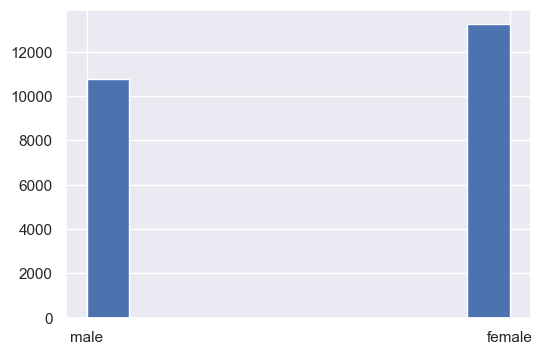

In [ ]:
print('Before coercion: \n', df_grouped_bar_graph['sex'].describe(),'\n') # already viewed as category, but there are missings
df_grouped_bar_graph['sex'].hist()

In [ ]:
# Create a missing dummy:
df_grouped_bar_graph['sex'+'_nan'] = df_grouped_bar_graph['sex'].isnull() # Equals 1 if missing, 0 if non-null
print('Total Missings: \n', sum(df_grouped_bar_graph['sex'+'_nan']),'\n') # How many missing values are there?

Total Missings: 
 112 



In [ ]:
# gets rid of all unknown/other responses from dataframe
df_grouped_bar_graph['sex'] = df_grouped_bar_graph['sex'].replace(["don't know", 'iap', 'uncodeable', "I don't have a job", 'dk, na, iap', 'no answer', 'not imputable_(2147483637)', 'not imputable_(2147483638)', 'refused', 'skipped on web', 'uncodeable', 'not available in this release', 'not available in this year', 'see codebook'],np.nan)
df_grouped_bar_graph['sex'] = df_grouped_bar_graph['sex'].dropna()

In [ ]:
# used to normalize the count to percentage of interviewees of each sex that answered yes for each response
def normalize_each_sex(df, sexes):
    # copy the dataframe
    df_norm = df.copy()
    count = df_norm['count'].astype(float)
    df_norm['count'] = count
    for sex in sexes:
        sex_sum = df_norm['count'].loc[df_norm['sex'] == sex].sum()
        df_norm['count'].loc[df_norm['sex'] == sex] = ((df_norm['count'].loc[df_norm['sex'] == sex])/sex_sum) * 100
    return df_norm

In [ ]:
# Statistics of Sex -- Categorical Variable
print(df_grouped_bar_graph['sex'].describe(), '\n')
print(df_grouped_bar_graph['sex'].value_counts()) # after cleaning

count      24018
unique         2
top       female
freq       13234
Name: sex, dtype: object 

sex
female    13234
male      10784
Name: count, dtype: int64


#### Bar Graphs

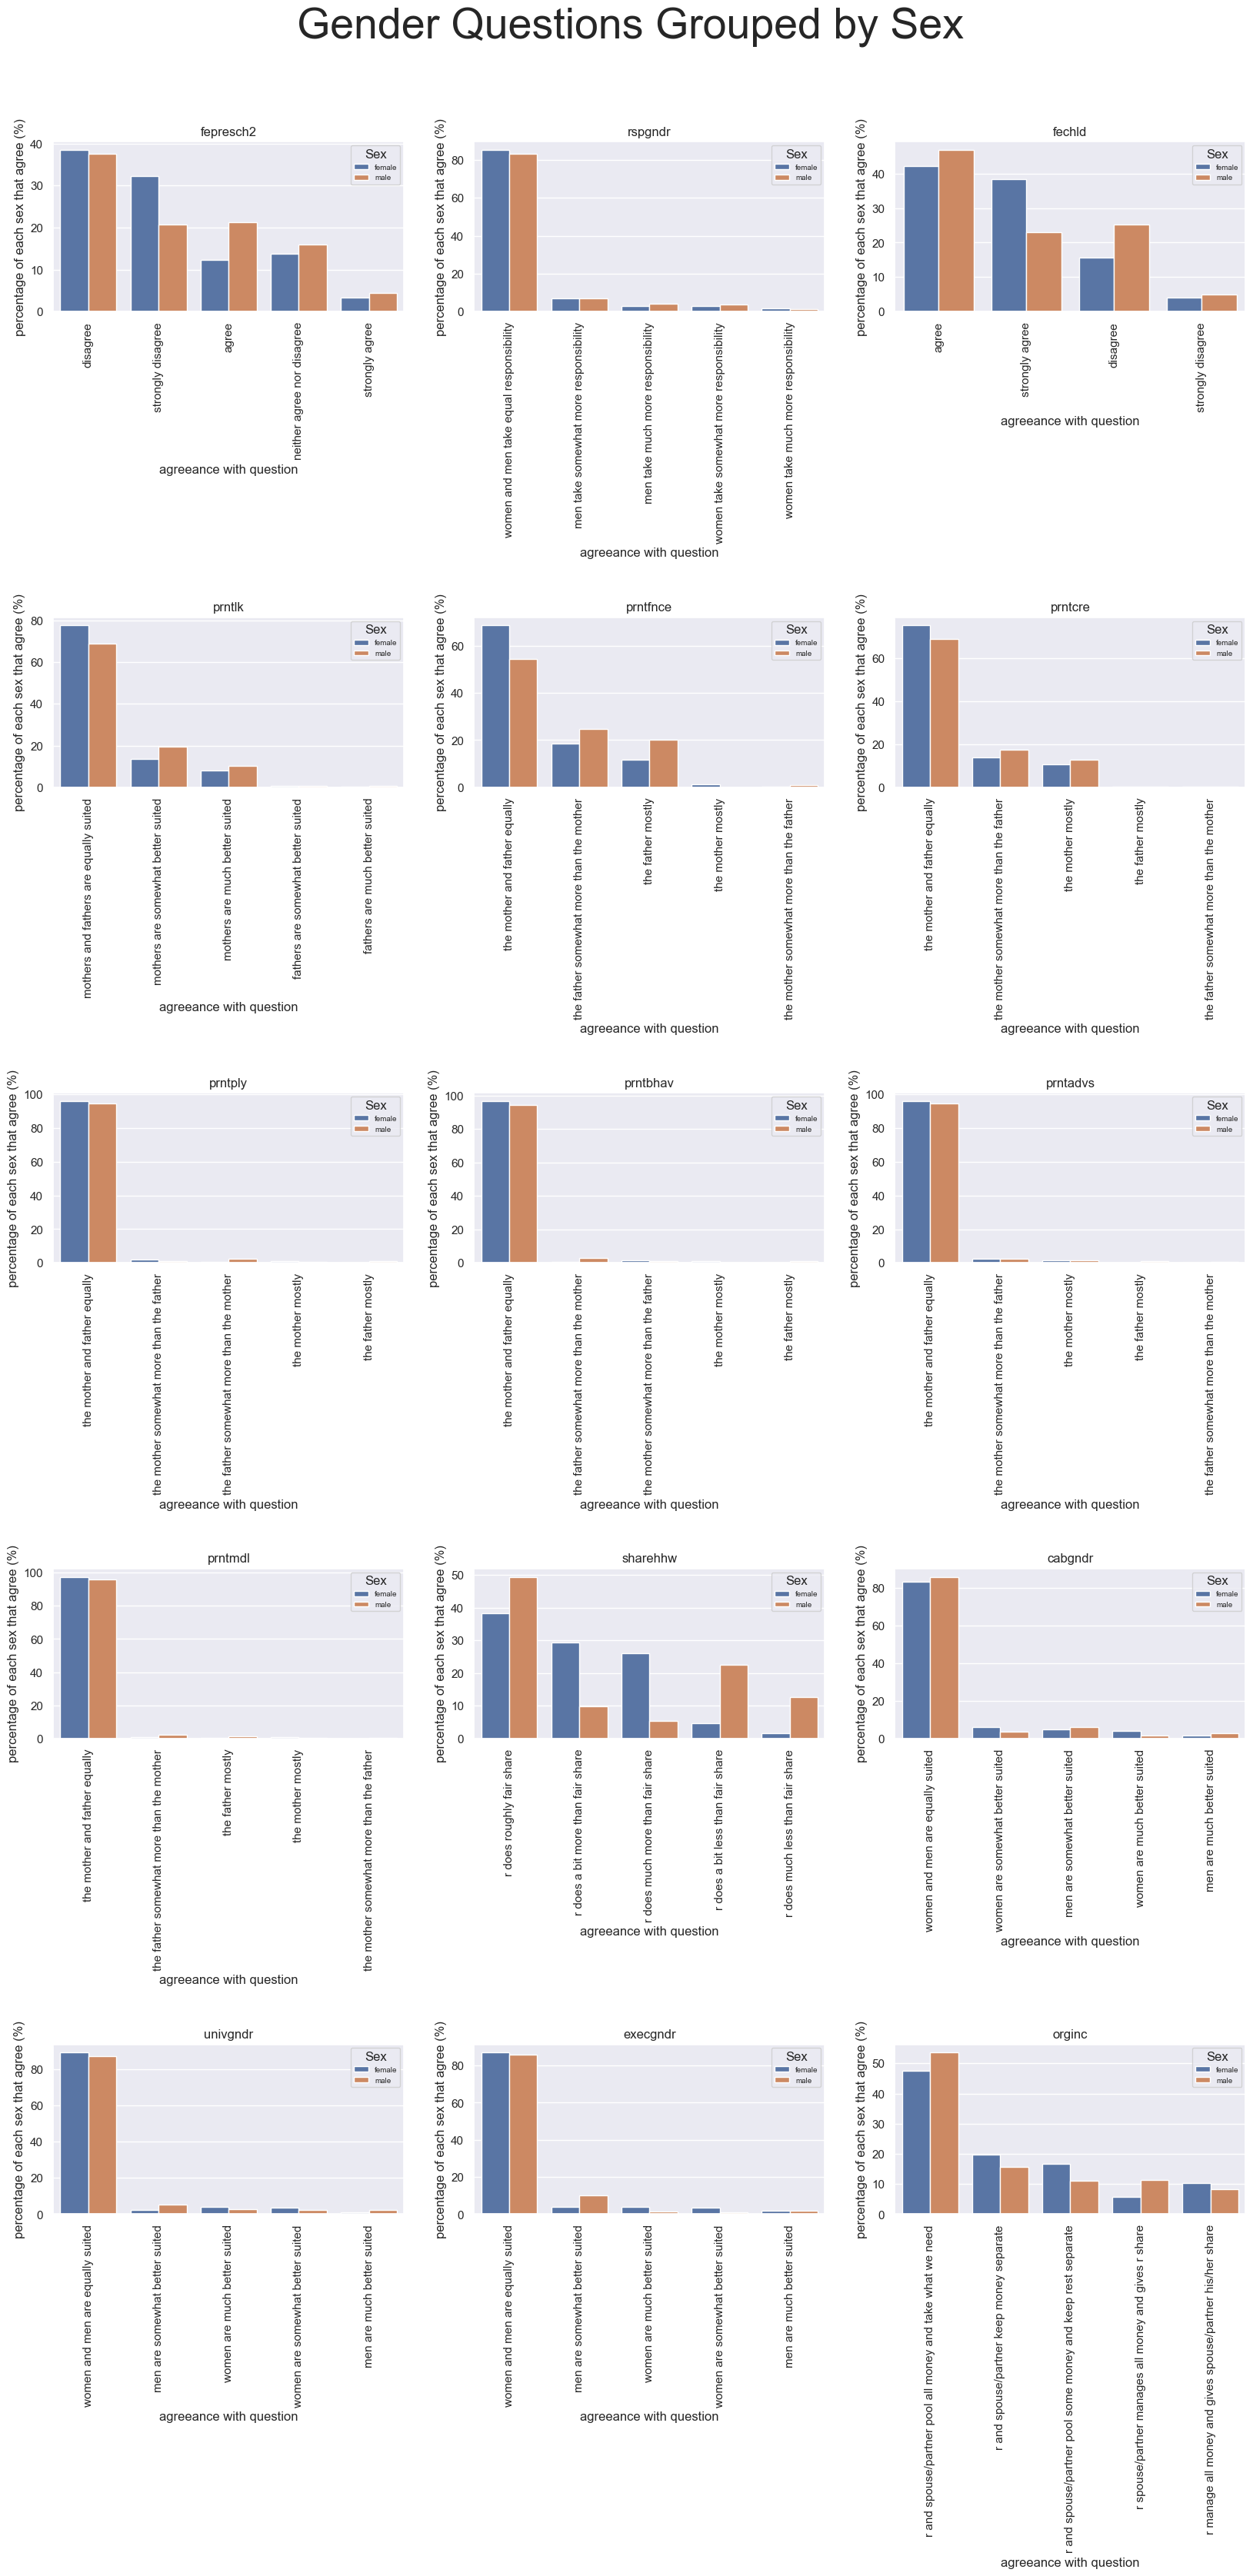

In [ ]:
import matplotlib.pyplot as plt

# handles general plot layout and formatting
plt.figure(figsize=(20, 35))
plt.tight_layout(pad=20.0)
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Gender Questions Grouped by Sex", fontsize=40, y=0.93)

# questions in survey that were relevant to our research question
tickers = ['fepresch2', 'rspgndr', 'fechld', 'prntlk', 'prntfnce', 'prntcre', 'prntply', 'prntbhav', 'prntadvs', 'prntmdl', 'sharehhw', 'cabgndr', 'univgndr', 'execgndr', 'orginc']

# loops through every relevant survey question for our research question
for n, ticker in enumerate(tickers):
    ax = plt.subplot(5, 3, n + 1) # size of plot
    curr_df = df_grouped_bar_graph.loc[:, ['sex', ticker]] # grab only the data related to current question and sex
    col = curr_df[ticker].astype(str) # handles inconsistent data types
    curr_df[ticker] = col
    curr_df = curr_df.dropna() # dropping all rows with NaN values because they can't be graphed

    if(ticker == 'rfamlook'): # the one numeric question that needs to be handled differently
      response = pd.DataFrame(data = curr_df.groupby(ticker).count()) # we ultimately decided to skip it later in the actual graphing because it seemed strange to have a numerical subplot when all other subplots were categorical
    else:
      response = pd.DataFrame(data = curr_df[ticker].value_counts())
    response = response.reset_index()
    response.columns = ['response', 'count']

    curr_df = curr_df.loc[curr_df[ticker].isin(response['response'])].value_counts()
    curr_df = curr_df.reset_index().rename(columns={"index": ticker, 0: "count"})
    curr_df = curr_df.loc[curr_df[ticker] != 'nan']

    sexes = curr_df['sex'].unique() # ensures no duplicate age groups
    curr_df = normalize_each_sex(curr_df, sexes) # normalizes the data

    if(ticker == 'rfamlook'): # used to handle legend placement differently but ended up not being necessary
      sns.barplot(data = curr_df, x = ticker, hue = 'sex') # graph and group by age for each response to the current question
      sns.set(rc={'figure.figsize':(6,4)})
      plt.legend(loc='upper right', title='Sex', prop={'size': 7})
      plt.xlabel("Count")
      plt.ylabel("Sex")
      plt.title(ticker)
      ax.tick_params(axis='x', labelrotation=90) # rotate x-labels 90 degrees
    else:
      sns.barplot(data = curr_df, x = ticker, y = 'count', hue = 'sex') # graph and group by age for each response to the current question
      sns.set(rc={'figure.figsize':(6,4)})
      plt.legend(loc='upper right', title='Sex', prop={'size': 7})
      plt.xlabel("agreeance with question")
      plt.ylabel("percentage of each sex that agree (%)")
      plt.title(ticker)
      ax.tick_params(axis='x', labelrotation=90) # rotate x-labels 90 degrees

# show the final plot
plt.subplots_adjust(hspace = 1.8)
plt.show()

###  Data Cleaning Notes/Challenges




Reponse options from the gender role questions often had categories with a zero count value, and these categories had to be removed simplify the basic bar graphs.

The religion, age, and sex variables also had to undergo some cleaning.
For religion, rows with NaN values had to be removed because they could not be graphed. As for the age variable, having a count per every instance of an age seemed complicated and unnecessary, so the age values were group by age ranges. This also gave a better visual of how gender role views varied by generation. When cleaning the sex variable, missing or unknown values had to be removed.

After cleaning and organizing the data of interest, it is now better prepared for analysis. The visualization of each of the gender role question reponses against the religion, age, and sex variables in a bar graph allows us to better look into trends in the data and decide what specific graphs are best suited to help answer our research question.

#### Example

Looking at an individual display of one of the basic plots:


In [ ]:
df['fechld'].value_counts()

fechld
agree                            6805
strongly agree                   4850
disagree                         3061
strongly disagree                 680
not imputable_(2147483638)          0
not available in this year          0
not available in this release       0
uncodeable                          0
skipped on web                      0
refused                             0
no answer                           0
not imputable_(2147483637)          0
dk, na, iap                         0
I don't have a job                  0
iap                                 0
don't know                          0
see codebook                        0
Name: count, dtype: int64

Just plotting this would include responses that are never given, which crowds the graph. So, value counts that were equal ot zero were removed.


Text(0.5, 1.0, 'A working mother can establish just as warm and secure a \n relationship with her children as a mother who does not work')

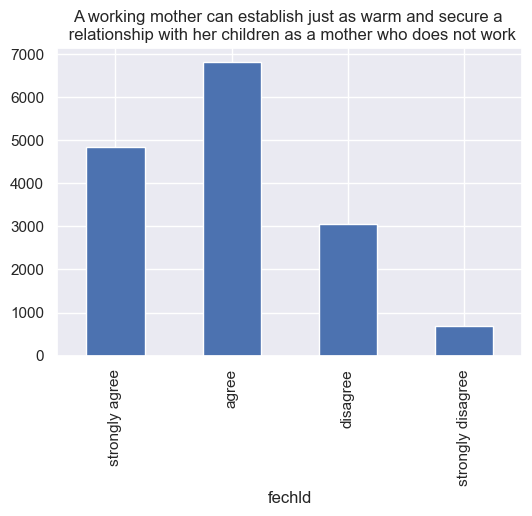

In [ ]:
#FECHLD
fechld = df['fechld'].value_counts()[['strongly agree','agree', 'disagree','strongly disagree']] # value counts returns type series
fechld[fechld != 0].plot(kind='bar') # removes counts equal to 0
plt.title("A working mother can establish just as warm and secure a \n relationship with her children as a mother who does not work")

# Results

A note on statistics: because we looked at mostly categorical data, it was hard to run any proper statistical analysis based on what we’ve learned in class. However, we can look at the distribution of our data based on the various categories we chose.

For religion, looking at the value counts, the number one religion that respondents practice is Christianity at 17292 respondents out of 24130 total practicing it. Following Christianity, are atheist participants of which there are 5326. The remaining participants of other religions number in the low hundreds, except interdenominational and Native American participants who numbered less than one hundred combined.

When looking at the sex of respondents, 13,234 were female and 10, 784. While the dataset did skew female, the percentage of female respondents does not carry a supermajority.
We can get better statistics looking at age, however, where the mean age of all participants was 49, with the standard deviation being roughly 17 years. The 25th percentile was 34 years old and the 75th percentile was 63 years old, which means our population was fairly well-distributed in age.

Using the basic plots as a comparison, the alignments among religion, age, and sex were compared.

Most of the basic plots showed responses in the middle of the spectrum between men and women, such as "mothers and fathers equally" for the variables fechld, prntlk, prntfnce, prntcre, prntply, prntbhav, prntadvs, prntmdl, sharehhw, and orginc (pertaining to familial dynamics), or "men and women equally suited" for the variables cabgndr, univgndr, and execgndr (pertaining to more professional dynamics).

The graphs grouped by religion showed the most variation from the trends of the basic graph.
- Most interesting findings for graphs grouped by religion:
    - The fepresch2 variable asks to what extent they agree a pre-schooler is likely to suffer if their mother works. Around a third of the respondents from most religions ‘disagreed’, and around a fourth of the respondents ‘strongly disagreed.’ Jewish and interdenominational people responded ‘strongly disagree’ more often than ‘disagree’.
    - The prntlk variable asks if mothers or fathers are better suited to look after their children. The majority of the respondents from most religions believed that ‘mothers and fathers are equally suited.’ Double the number of Hindus selected  'mothers are somewhat better suited' than ‘mothers and fathers are equally suited.’
    - The prntfnce variable asks which parent should provide for the family financially. Around 60% of respondents thought the mother and the father should provide equally. Buddhists and Hindus had selected 'father somewhat' more than 'equally', while interdenominational people had an equal amount of 'equal' and 'father most'.
    - The sharehhw variable asks about the sharing of household work between spouses/partners. Almost 100% of Hindus had selected 'r does much less than fair' where r is the respondent.
    - The cabgndr variable asks how well they believe men and women are suited for a cabinet position. Muslim respondents exclusively responded that ‘women and men are equally suited’ for leadership positions; hindu respondents mostly agreed that ‘women and men are equally suited’ and ‘women are somewhat better suited’ for leadership roles with a minority answering that ‘men are much better suited’ for leadership roles.
    - The execgndr variable asks which gender is better suited to serve as a senior executive of a company. Hindus were equally split between 'men and women are equally suited', 'women are somewhat better suited', and 'women are much better suited.'
    - The orginc variable asks how partners organize their income. Muslims equally answered that 'r[they] and spouse/partner pool all money and take what we need' and 'r[they] and spouse/partner keep all money separate.'
- It seems that in general, Hindu and Muslim practitioners tend to have more traditional views on the female role in the household, except for holding leadership positions. In Jewish and non-denominational households, this does not hold. This is possibly due to differences in culture for people of Muslim or Hindu faith compared to people of non-denominational or Jewish faith.
Almost all of the age and gender graphs followed the trends of the basic graphs, with the most neutral response option between men and women gender roles being the most frequent response.
- Most interesting findings for age graphs:
    - For the variable orginc, asking how partners organize their income, the age range '18-29' has equal amounts of responses across all options
    - For the variable  sharehhw, asking about the sharing of household work between spouses/partners, respondents from all age groups are split on each response, with the greatest number of respondents answering that ‘r [they] does roughly fair share’
- Most interesting findings for gender graphs:
    - For the variable fechld: To what extent do you agree or disagree...? A working mother can establish just as warm and secure a relationship with her children as a mother who does not work, females follow the trend of the basic graphs with more 'strongly agree' responses than males. Also, males don't follow the trend as most ‘agree’ followed by ‘disagree’.
    - For the fepresch2 variable, more females than males ‘strongly disagree’, on whether a preschool child will likely suffer if their mother works
    - For the sharehhw variable, every category points towards women doing more housework.
- It’s interesting to differences when looking at gender compared to age in some responses. For example, it seems that when it comes to income and general household work, people of all ages generally think it is shared fairly between partners, however, when comparing by sex, all responses point towards women doing more housework. Yet when looking at whether or not a child will suffer and not have as good of a relationship with their mother if that mother works, women generally agree more then men that the child will suffer, which suggests that either women place more of an emphasis on spending time with their children or men don’t see not having a stay-at-home parent as detrimental to the development of a child.

#### Visualizations

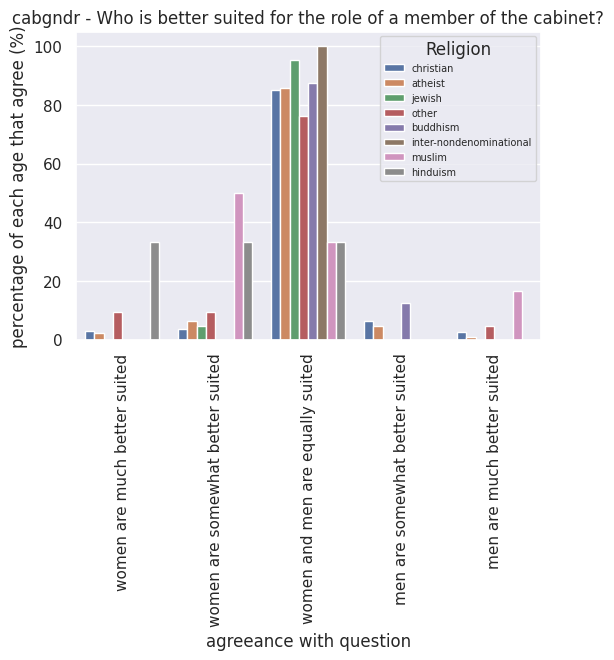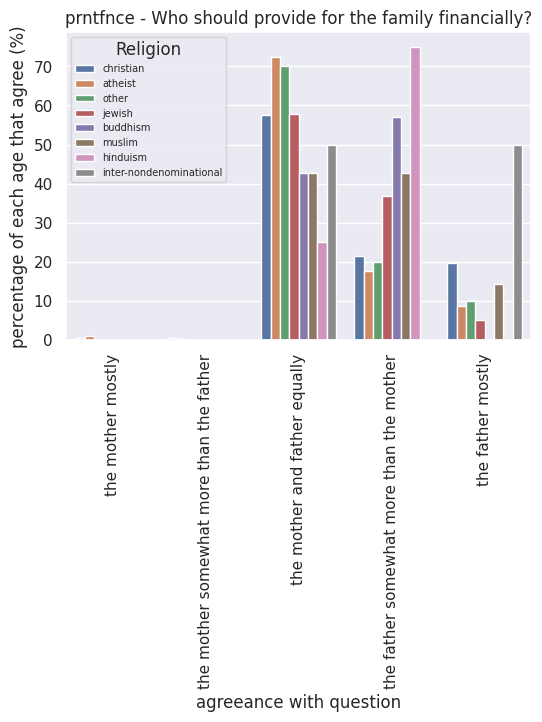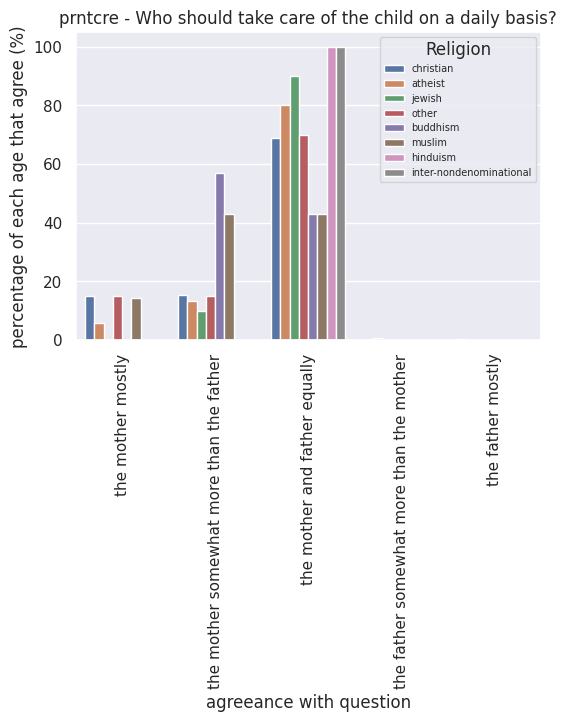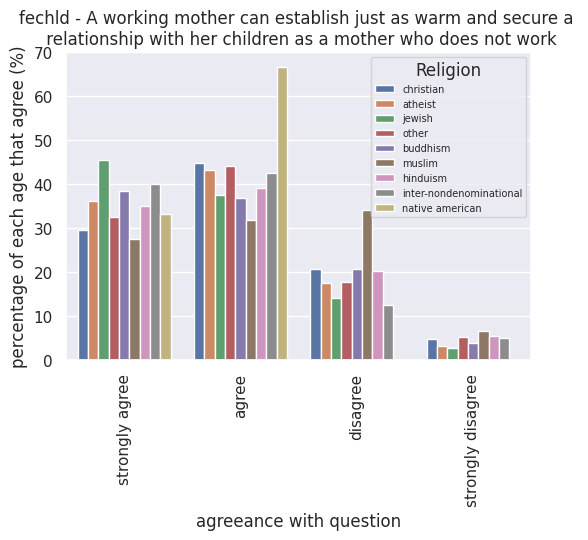

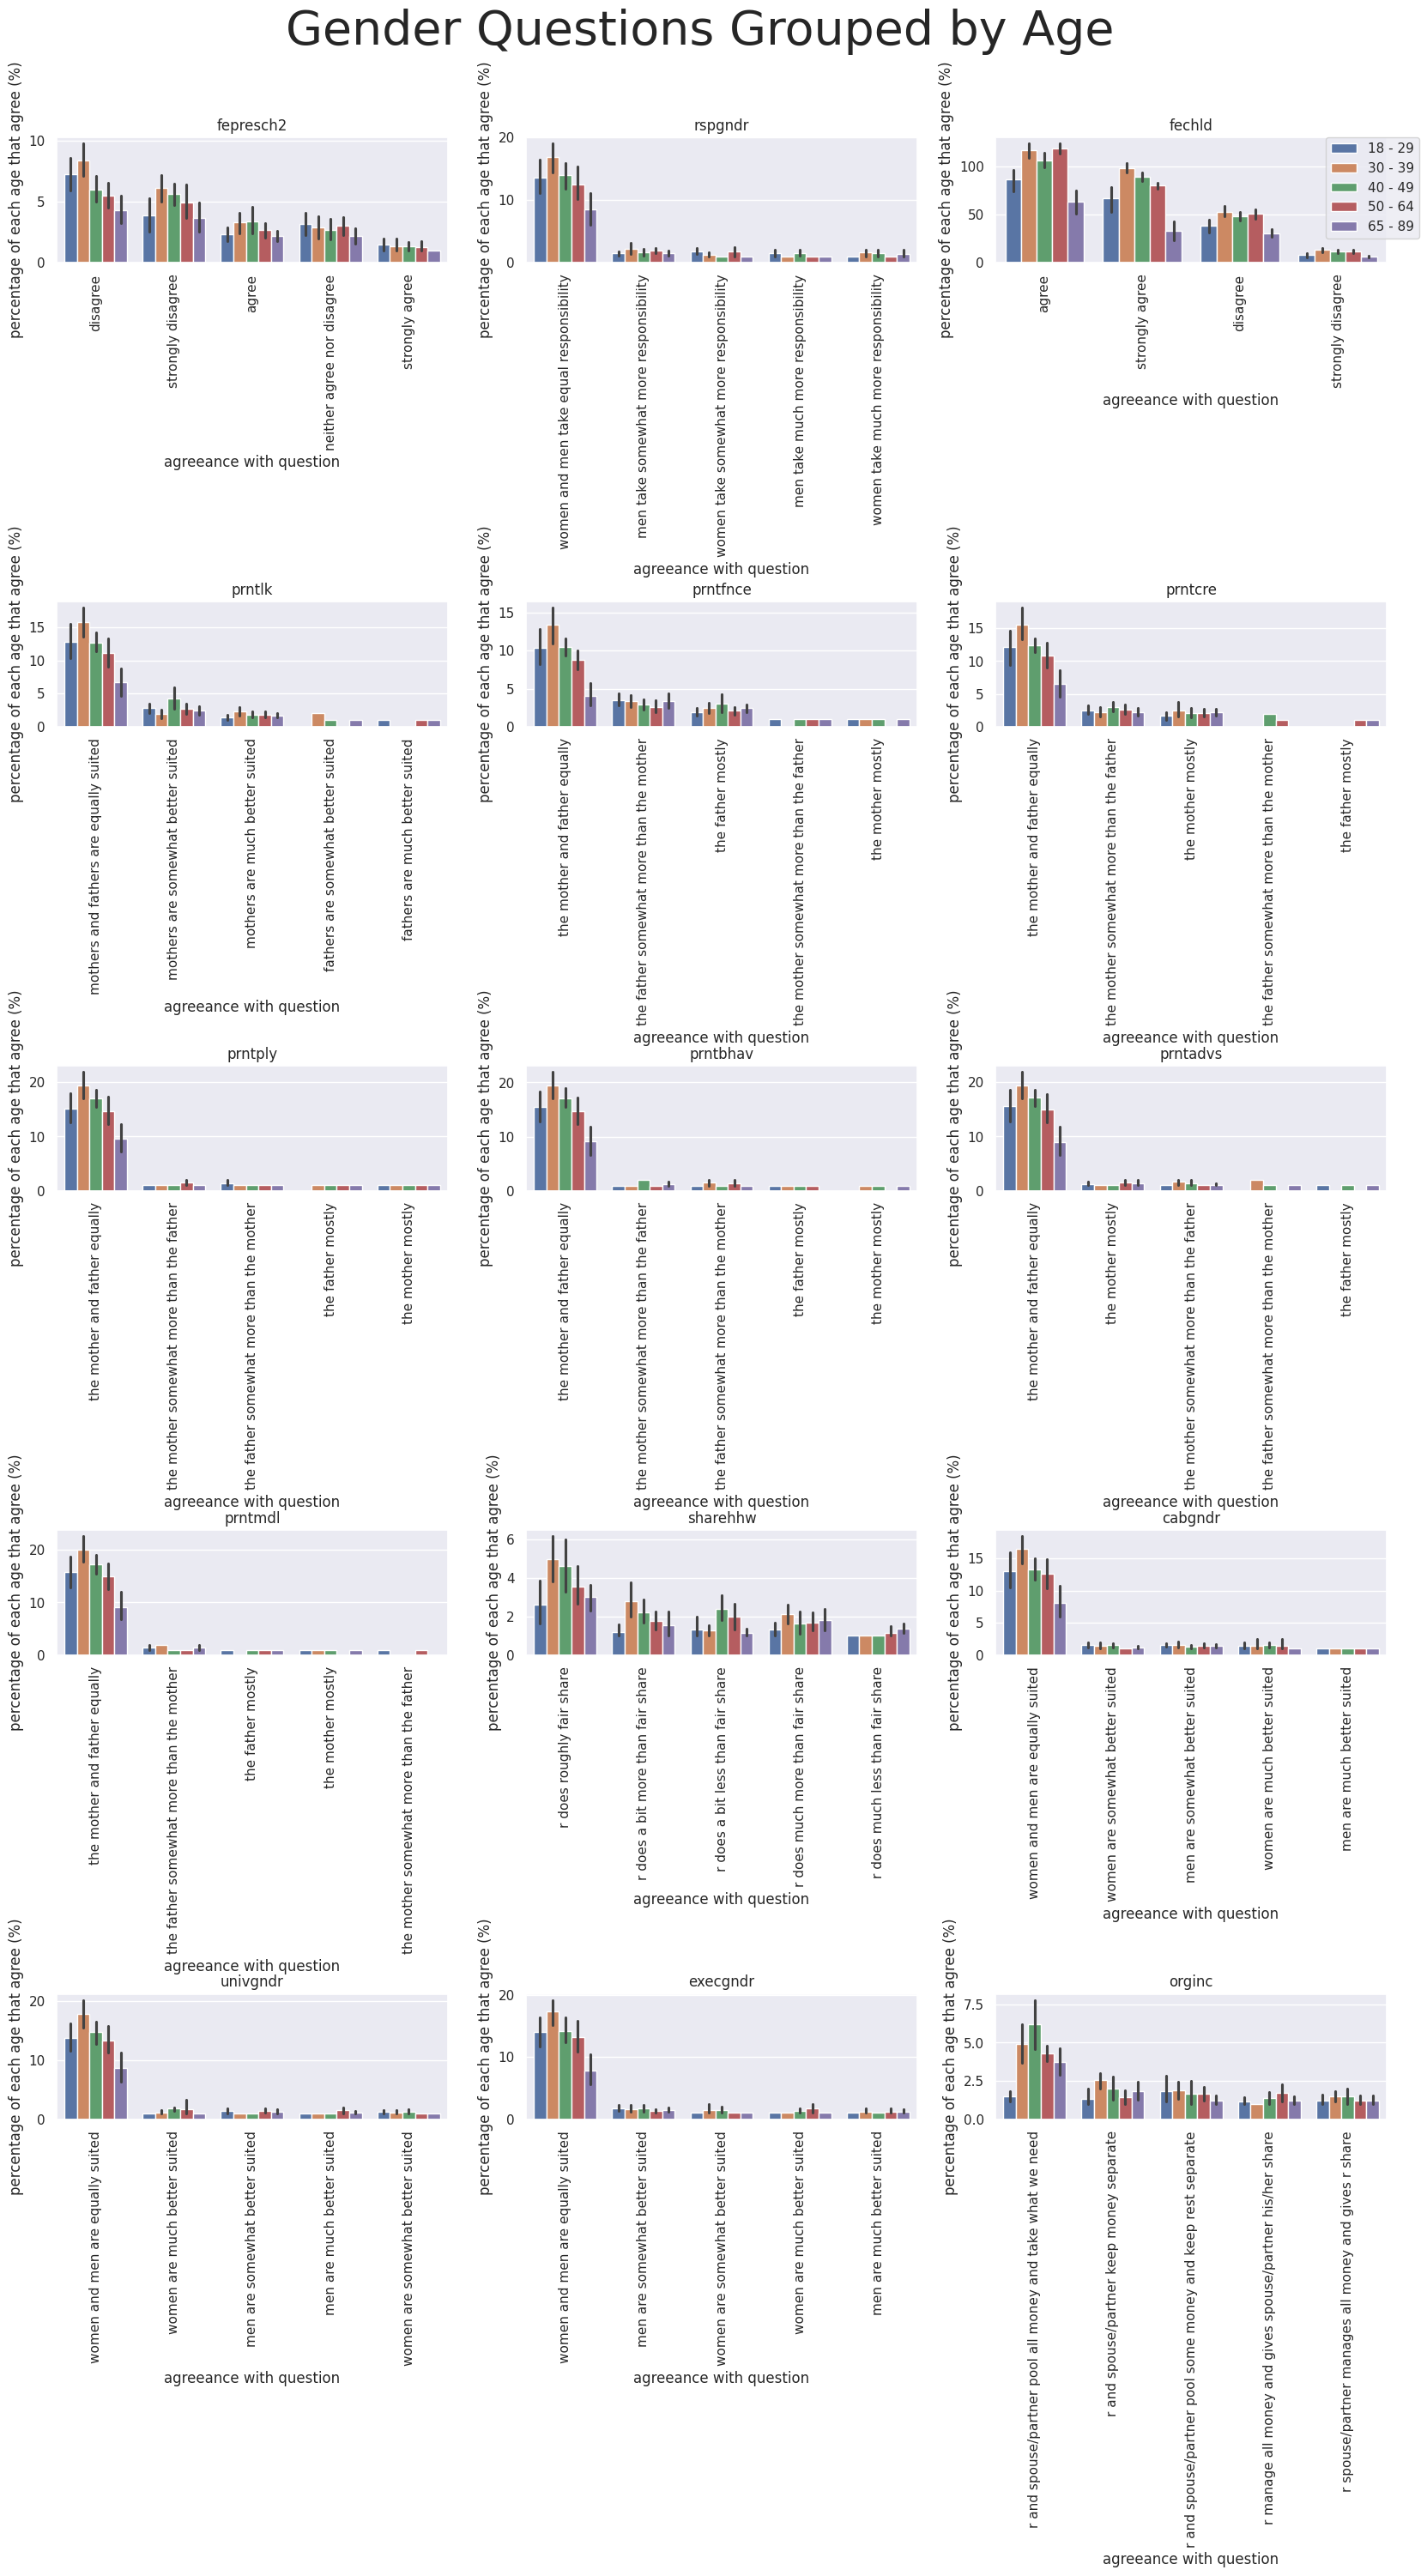




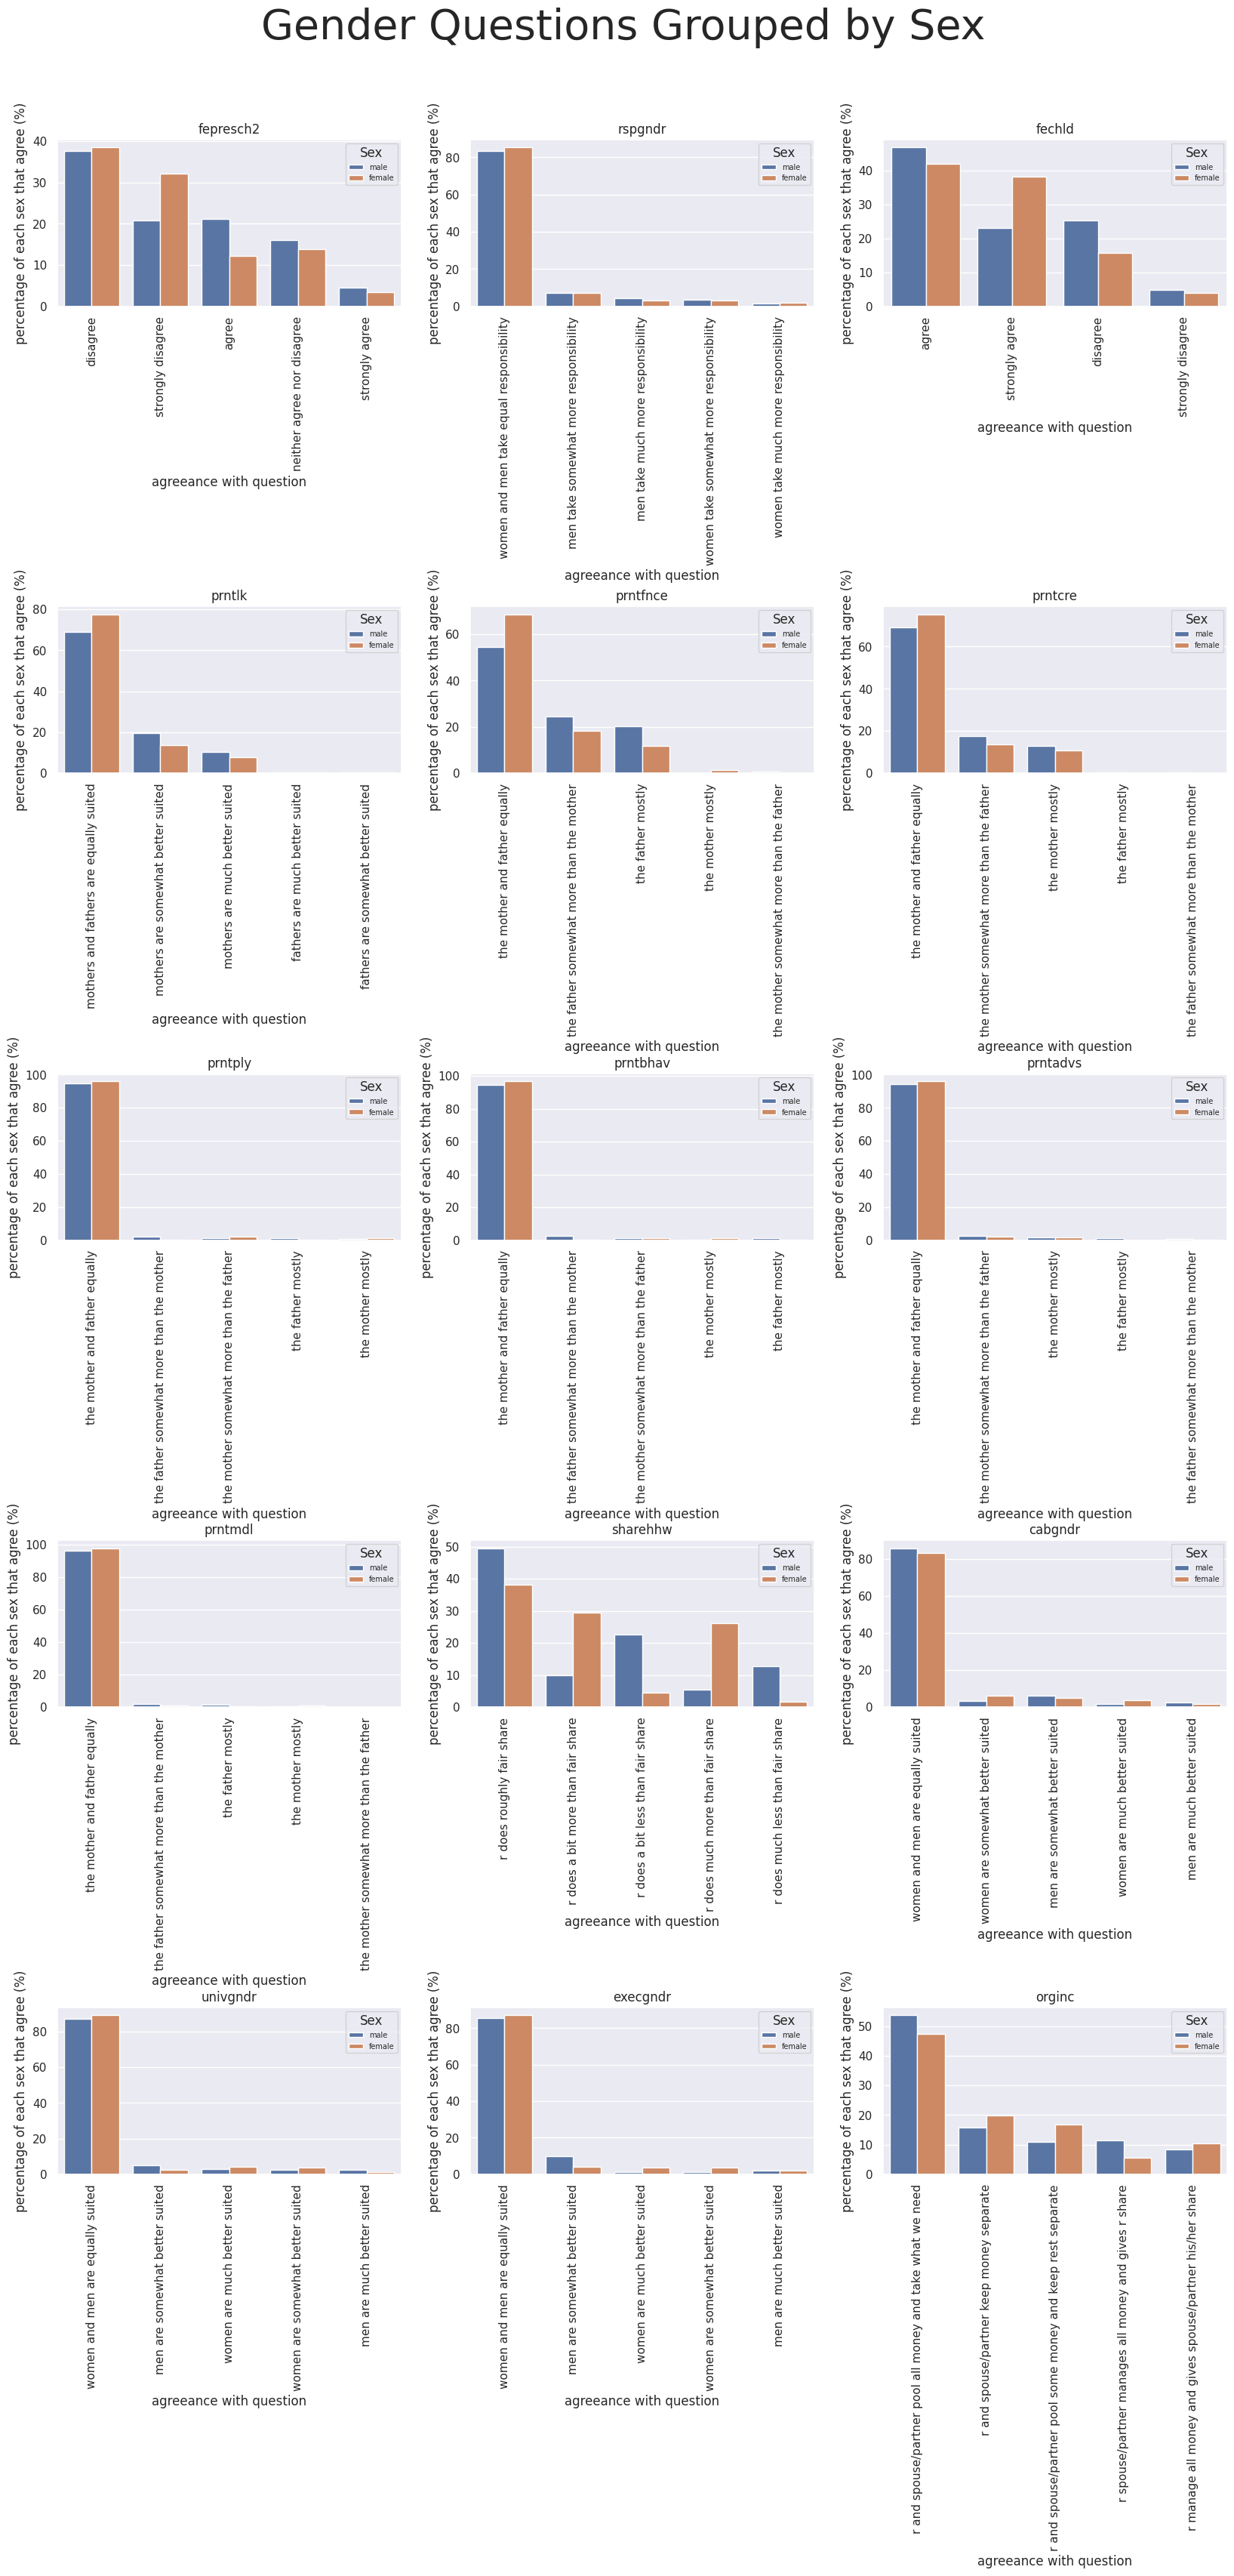

# Conclusion

In this project, we decided to look more closely into the prntfnce, prntcre, fechld and cabgndr variables, which represent who provides the family finances, who provides family care, views on the capabilities of working moms, and views on men and women in leadership roles. When looking at these variables across religion, age, and gender and comparing it to the overall responses from the basic plots, it was found that not all of the same trends aligned. For all of the variables, the most common response amongst the basic plots was that men and women are equally suited or responsible in these situations. However, among religion, regarding the variable 'prntfnce', which is associated with who (the mother or father) should provide for the family (consisting of the mother, father, and a 5 year old child) financially, the majority of individuals who identify as Hindu and Buddhist answered that the father is responsible somewhat more than the mother, with some answering that they should equally provide. It is interesting to note that while individuals identifying with other religions also responded that the father should mostly provide for the family, those identifying as Hindu and Buddhist did not. This could potentially be explained by the community standard of equitable familial contributions in both of these religions.

For age ranges, in regards to the fechld variable, all age ranges either agreed or strongly agreed the most with the statement. All age ranges also had the majority respond that men and women are equal for the prntcre, prntfnce, and cabgndr variables. For the most part, all age ranges followed similar patterns of responses across the different questions, but there were some exceptions. For the prntcre variable, associated with whether the mother or father should care for the child, a higher proportion of individuals in the youngest age range responded that the father and mother should equally care for the child than the proportion of individuals in the oldest age range that did so. Historically, individuals of older generations grew up in a society that emphasized the expectation of women as the caregivers and men as the breadwinners. Now, these expectations have started to change to allow for more balanced familial contributions of both men and women. These differences could have played a role in the pattern observed. Overall, while there were not many notable differences on gender role views between age groups, those that were present were interesting.

As for differences in gender roles amongst the sexes, for the prntfnce variable, more women thought the mother and father should contribute equally than men, whereas more men thought the father should contribute mostly or somewhat more than the mother than women did. The opposite trend is seen with the prntcre variable, although still slightly more women agreed that the mother and father are equal than men. Interestingly, the majority of men and women chose the equal response for the cabgnr variable, however for the others, men and women each though their gender was slightly better suited or much better suited than their counterparts. For the fechld variable, women led in the category of strongly agreeing, whilst men led in the categories of disagreeing, however overall, both majorities agreed. In summary, although the sex variables align closely with the basic plots, some trends in the higher view of women towards themselves and men towards themselves can be seen as being preferred in leadership and work-life balance capability roles. Additionally, women tend to view financial and childcare responsibilities as more equitable between parents than men, and men tend to think that the fathers should provide more financially, while the women should provide more in regards to childcare.

Criticism Defense: The information in the plot looking at age may lead to some judgment upon the lack of responses in certain categories by some age groups. However, that is why it is important to take into account the counts of the number of overall GSS survey responses from each age group. It can be seen in the Counts of Each Age Group plot in the data section that there is a higher count of responses in the older two age groups, thus allowing us to recognize that these age groups may have a larger weight on the data analysis results. The same considerations can be taken towards sex, as the count of female vs. male GSS survey responses was greater than male.

Some additional work that could be performed that was outside the scope of this project is analyzing the change in gender role views over time. This could not be accomplished during this project because the data used for this question only spans over a time period of 4 years, with the ISSP Family and Changing Gender Roles module having only been asked four times beginning in 1988.